# Project 1 - Forecast model for electricity consumption in the North Tower of IST

The objective is to develop a model to forecast electricity consumption in the North Tower of IST for the next hour and the next day based on 2017 and 2018 electricity consumption data.

**This project uses the Holidays Library in Python. If you have not installed it go to the Anaconda Prompt in your PC and write "pip install holidays" to install the library**

## 1 - Data Collection, Preparation and Cleaning

The first step consists in importing meteorologic and energy consumption data from csv files.

### 1.1 - Data Collection

**Import Libraries**

In [1]:

import pandas as pd # data science library o manipulate data
import numpy as np # mathematical library to manipulate arrays and matrices
import matplotlib.pyplot as mplt # visualization library
import seaborn as sb #visualization library specific for data science, based on matplotlib


**Import Data files**

In [2]:
df_raw_meteo = pd.read_csv('IST_meteo_data_2017_2018_2019.csv')
df_raw_NT_2017 = pd.read_csv('IST_North_Tower_2017.csv')
df_raw_NT_2018 = pd.read_csv('IST_North_Tower_2018.csv')

**Observe Data**

First, we need to observe all the imported files (raw dataframes), properties and check for possible missing values (NaNs) 

**Meteorologic Data**

In [3]:
df_raw_meteo

yyyy-mm-dd hh:mm:ss  temp_C     HR  windSpeed_m/s  windGust_m/s  \
0       2017-01-01 00:00:00    8.72  74.60          2.138         3.774   
1       2017-01-01 00:05:00    8.68  74.60          1.929         3.019   
2       2017-01-01 00:10:00    8.69  74.50          1.824         2.516   
3       2017-01-01 00:15:00    8.62  75.10          2.264         3.271   
4       2017-01-01 00:20:00    8.63  75.00          3.061         3.774   
...                     ...     ...    ...            ...           ...   
215004  2019-04-11 14:43:00   15.70  43.97          0.000         0.000   
215005  2019-04-11 14:48:00   15.35  44.42          0.000         0.000   
215006  2019-04-11 14:53:00   15.34  41.15          0.000         0.000   
215007  2019-04-11 15:18:00   15.26  42.01          0.000         0.000   
215008  2019-04-11 15:23:00   15.32  41.49          0.000         0.000   

        pres_mbar  solarRad_W/m2  rain_mm/h  rain_day  
0            1029          1.163        0.0       0.0  
1            1029          1.496        0.0       0.0  
2            1029          1.025        0.0       0.0  
3            1029          1.690        0.0       0.0  
4            1029          1.108        0.0       0.0  
...           ...            ...        ...       ...  
215004       1021        348.000        0.0       0.0  
215005       1021        273.000        0.0       0.0  
215006       1021        320.900        0.0       0.0  
215007       1021        615.900        0.0       0.0  
215008       1021        423.600        0.0       0.0  

[215009 rows x 9 columns]

**North Tower 2017**

In [4]:
df_raw_NT_2017

Date_start   Power_kW
0        1-1-2017 0:00  42.996430
1        1-1-2017 1:00  42.751928
2        1-1-2017 2:00  42.861834
3        1-1-2017 3:00  42.317769
4        1-1-2017 4:00  42.653385
...                ...        ...
8755  31-12-2017 19:00  43.511653
8756  31-12-2017 20:00  43.653022
8757  31-12-2017 21:00  41.317476
8758  31-12-2017 22:00  41.180039
8759  31-12-2017 23:00  41.287760

[8760 rows x 2 columns]

**North Tower 2018**

In [5]:
df_raw_NT_2018

Date_start   Power_kW
0        1-1-2018 0:00  40.694314
1        1-1-2018 1:00  40.970935
2        1-1-2018 2:00  41.103127
3        1-1-2018 3:00  41.034081
4        1-1-2018 4:00  40.559500
...                ...        ...
8755  31-12-2018 19:00  70.132164
8756  31-12-2018 20:00  58.661569
8757  31-12-2018 21:00  43.897742
8758  31-12-2018 22:00  41.808445
8759  31-12-2018 23:00  40.234153

[8760 rows x 2 columns]

In [6]:
df_raw_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215009 entries, 0 to 215008
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   yyyy-mm-dd hh:mm:ss  215009 non-null  object 
 1   temp_C               215009 non-null  float64
 2   HR                   215009 non-null  float64
 3   windSpeed_m/s        215009 non-null  float64
 4   windGust_m/s         215009 non-null  float64
 5   pres_mbar            215009 non-null  int64  
 6   solarRad_W/m2        215009 non-null  float64
 7   rain_mm/h            215009 non-null  float64
 8   rain_day             215009 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 14.8+ MB


In [7]:
print(df_raw_meteo['temp_C'].isnull().sum())

0


In [8]:
empty_temp_C = df_raw_meteo[pd.isnull(df_raw_meteo['temp_C'])]['temp_C']
print(empty_temp_C)

Series([], Name: temp_C, dtype: float64)


In [9]:
df_raw_NT_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date_start  8760 non-null   object 
 1   Power_kW    8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [10]:
df_raw_NT_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date_start  8760 non-null   object 
 1   Power_kW    8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


### 1.2 - Data Preparation and Cleaning

**Combine North Tower Data**

In [11]:
df_raw_NT = pd.concat([df_raw_NT_2017, df_raw_NT_2018])
df_raw_NT=df_raw_NT.reset_index(drop=True)

In [12]:
df_raw_NT

Date_start   Power_kW
0         1-1-2017 0:00  42.996430
1         1-1-2017 1:00  42.751928
2         1-1-2017 2:00  42.861834
3         1-1-2017 3:00  42.317769
4         1-1-2017 4:00  42.653385
...                 ...        ...
17515  31-12-2018 19:00  70.132164
17516  31-12-2018 20:00  58.661569
17517  31-12-2018 21:00  43.897742
17518  31-12-2018 22:00  41.808445
17519  31-12-2018 23:00  40.234153

[17520 rows x 2 columns]

**Change Date column into Datetime type with Hour info**

In [13]:
df_raw_NT['Date_start'] = pd.to_datetime(df_raw_NT['Date_start'], format='%d-%m-%Y %H:%M')

In [14]:
df_raw_NT

Date_start   Power_kW
0     2017-01-01 00:00:00  42.996430
1     2017-01-01 01:00:00  42.751928
2     2017-01-01 02:00:00  42.861834
3     2017-01-01 03:00:00  42.317769
4     2017-01-01 04:00:00  42.653385
...                   ...        ...
17515 2018-12-31 19:00:00  70.132164
17516 2018-12-31 20:00:00  58.661569
17517 2018-12-31 21:00:00  43.897742
17518 2018-12-31 22:00:00  41.808445
17519 2018-12-31 23:00:00  40.234153

[17520 rows x 2 columns]

In [15]:
df_raw_NT.dtypes

Date_start    datetime64[ns]
Power_kW             float64
dtype: object

**Use date as index**

In [16]:
df_NT_clean = df_raw_NT.set_index ('Date_start', drop = True)

In [17]:
df_NT_clean

Power_kW
Date_start                    
2017-01-01 00:00:00  42.996430
2017-01-01 01:00:00  42.751928
2017-01-01 02:00:00  42.861834
2017-01-01 03:00:00  42.317769
2017-01-01 04:00:00  42.653385
...                        ...
2018-12-31 19:00:00  70.132164
2018-12-31 20:00:00  58.661569
2018-12-31 21:00:00  43.897742
2018-12-31 22:00:00  41.808445
2018-12-31 23:00:00  40.234153

[17520 rows x 1 columns]

Now, apply the same for meteorologic data

In [18]:
df_raw_meteo['yyyy-mm-dd hh:mm:ss']=pd.to_datetime(df_raw_meteo['yyyy-mm-dd hh:mm:ss'])

In [19]:
df_raw_meteo

yyyy-mm-dd hh:mm:ss  temp_C     HR  windSpeed_m/s  windGust_m/s  \
0      2017-01-01 00:00:00    8.72  74.60          2.138         3.774   
1      2017-01-01 00:05:00    8.68  74.60          1.929         3.019   
2      2017-01-01 00:10:00    8.69  74.50          1.824         2.516   
3      2017-01-01 00:15:00    8.62  75.10          2.264         3.271   
4      2017-01-01 00:20:00    8.63  75.00          3.061         3.774   
...                    ...     ...    ...            ...           ...   
215004 2019-04-11 14:43:00   15.70  43.97          0.000         0.000   
215005 2019-04-11 14:48:00   15.35  44.42          0.000         0.000   
215006 2019-04-11 14:53:00   15.34  41.15          0.000         0.000   
215007 2019-04-11 15:18:00   15.26  42.01          0.000         0.000   
215008 2019-04-11 15:23:00   15.32  41.49          0.000         0.000   

        pres_mbar  solarRad_W/m2  rain_mm/h  rain_day  
0            1029          1.163        0.0       0.0  
1            1029          1.496        0.0       0.0  
2            1029          1.025        0.0       0.0  
3            1029          1.690        0.0       0.0  
4            1029          1.108        0.0       0.0  
...           ...            ...        ...       ...  
215004       1021        348.000        0.0       0.0  
215005       1021        273.000        0.0       0.0  
215006       1021        320.900        0.0       0.0  
215007       1021        615.900        0.0       0.0  
215008       1021        423.600        0.0       0.0  

[215009 rows x 9 columns]

In [20]:
df_meteo_clean = df_raw_meteo.set_index ('yyyy-mm-dd hh:mm:ss', drop = True)

In [21]:
df_meteo_clean.head()

temp_C    HR  windSpeed_m/s  windGust_m/s  pres_mbar  \
yyyy-mm-dd hh:mm:ss                                                         
2017-01-01 00:00:00    8.72  74.6          2.138         3.774       1029   
2017-01-01 00:05:00    8.68  74.6          1.929         3.019       1029   
2017-01-01 00:10:00    8.69  74.5          1.824         2.516       1029   
2017-01-01 00:15:00    8.62  75.1          2.264         3.271       1029   
2017-01-01 00:20:00    8.63  75.0          3.061         3.774       1029   

                     solarRad_W/m2  rain_mm/h  rain_day  
yyyy-mm-dd hh:mm:ss                                      
2017-01-01 00:00:00          1.163        0.0       0.0  
2017-01-01 00:05:00          1.496        0.0       0.0  
2017-01-01 00:10:00          1.025        0.0       0.0  
2017-01-01 00:15:00          1.690        0.0       0.0  
2017-01-01 00:20:00          1.108        0.0       0.0

As the meteorologic dataframe has data with timestamps of 5 min and the North Tower Data has intervals of 1h, we need to resample in order to have hourly values of meteorologic data.

In [22]:
df_clean_meteo_hourly = df_meteo_clean.resample('H').mean()

In [23]:
print(df_clean_meteo_hourly)

                        temp_C         HR  windSpeed_m/s  windGust_m/s  \
yyyy-mm-dd hh:mm:ss                                                      
2017-01-01 00:00:00   8.532500  74.966667       2.344500      3.270750   
2017-01-01 01:00:00   7.930000  76.308333       2.692417      3.480333   
2017-01-01 02:00:00   7.263417  80.275000       3.300250      4.067167   
2017-01-01 03:00:00   6.831333  81.333333       3.534333      4.423583   
2017-01-01 04:00:00   6.500250  81.241667       4.006000      5.262333   
...                        ...        ...            ...           ...   
2019-04-11 11:00:00  15.615000  47.215000       0.000000      0.000000   
2019-04-11 12:00:00  15.872500  46.630000       0.000000      0.000000   
2019-04-11 13:00:00  16.315833  45.955833       0.000000      0.000000   
2019-04-11 14:00:00  15.755455  45.820909       0.000000      0.000000   
2019-04-11 15:00:00  15.290000  41.750000       0.000000      0.000000   

                       pres_mbar  sol

Now, we need to merge the two dataframes (North tower energy consumption and meteorological data)

In [24]:
merged_data=pd.merge(df_NT_clean,df_clean_meteo_hourly , how='outer', left_index=True, right_index=True)

In [25]:
merged_data

Power_kW     temp_C         HR  windSpeed_m/s  \
2017-01-01 00:00:00  42.996430   8.532500  74.966667       2.344500   
2017-01-01 01:00:00  42.751928   7.930000  76.308333       2.692417   
2017-01-01 02:00:00  42.861834   7.263417  80.275000       3.300250   
2017-01-01 03:00:00  42.317769   6.831333  81.333333       3.534333   
2017-01-01 04:00:00  42.653385   6.500250  81.241667       4.006000   
...                        ...        ...        ...            ...   
2019-04-11 11:00:00        NaN  15.615000  47.215000       0.000000   
2019-04-11 12:00:00        NaN  15.872500  46.630000       0.000000   
2019-04-11 13:00:00        NaN  16.315833  45.955833       0.000000   
2019-04-11 14:00:00        NaN  15.755455  45.820909       0.000000   
2019-04-11 15:00:00        NaN  15.290000  41.750000       0.000000   

                     windGust_m/s    pres_mbar  solarRad_W/m2  rain_mm/h  \
2017-01-01 00:00:00      3.270750  1029.000000       1.355083        0.0   
2017-01-01 01:00:00      3.480333  1028.166667       1.477333        0.0   
2017-01-01 02:00:00      4.067167  1028.000000       1.415083        0.0   
2017-01-01 03:00:00      4.423583  1028.000000       1.542000        0.0   
2017-01-01 04:00:00      5.262333  1028.000000       0.891000        0.0   
...                           ...          ...            ...        ...   
2019-04-11 11:00:00      0.000000  1022.083333     869.200000        0.0   
2019-04-11 12:00:00      0.000000  1022.000000     640.591667        0.0   
2019-04-11 13:00:00      0.000000  1021.416667     855.808333        0.0   
2019-04-11 14:00:00      0.000000  1021.090909     625.072727        0.0   
2019-04-11 15:00:00      0.000000  1021.000000     519.750000        0.0   

                     rain_day  
2017-01-01 00:00:00       0.0  
2017-01-01 01:00:00       0.0  
2017-01-01 02:00:00       0.0  
2017-01-01 03:00:00       0.0  
2017-01-01 04:00:00       0.0  
...                       ...  
2019-04-11 11:00:00       0.0  
2019-04-11 12:00:00       0.0  
2019-04-11 13:00:00       0.0  
2019-04-11 14:00:00       0.0  
2019-04-11 15:00:00       0.0  

[19938 rows x 9 columns]

In [26]:
merged_data.rename(columns = {'Power_kW': 'Power (kW)','temp_C': 'Temperature (ºC)','HR': 'Relative Humidity (%)', 'windSpeed_m/s': 'Wind Speed (m/s)', 'windGust_m/s': 'Wind Gust (m/s)', 'pres_mbar': 'Pressure (mbar)','solarRad_W/m2': 'Solar Radiation (W/m2)', 'rain_mm/h': 'Rain (mm/h)', 'rain_day': 'Rain Day'}, inplace = True)

In [27]:
merged_data

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 00:00:00   42.996430          8.532500              74.966667   
2017-01-01 01:00:00   42.751928          7.930000              76.308333   
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
...                         ...               ...                    ...   
2019-04-11 11:00:00         NaN         15.615000              47.215000   
2019-04-11 12:00:00         NaN         15.872500              46.630000   
2019-04-11 13:00:00         NaN         16.315833              45.955833   
2019-04-11 14:00:00         NaN         15.755455              45.820909   
2019-04-11 15:00:00         NaN         15.290000              41.750000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2017-01-01 00:00:00          2.344500         3.270750      1029.000000   
2017-01-01 01:00:00          2.692417         3.480333      1028.166667   
2017-01-01 02:00:00          3.300250         4.067167      1028.000000   
2017-01-01 03:00:00          3.534333         4.423583      1028.000000   
2017-01-01 04:00:00          4.006000         5.262333      1028.000000   
...                               ...              ...              ...   
2019-04-11 11:00:00          0.000000         0.000000      1022.083333   
2019-04-11 12:00:00          0.000000         0.000000      1022.000000   
2019-04-11 13:00:00          0.000000         0.000000      1021.416667   
2019-04-11 14:00:00          0.000000         0.000000      1021.090909   
2019-04-11 15:00:00          0.000000         0.000000      1021.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2017-01-01 00:00:00                1.355083          0.0       0.0  
2017-01-01 01:00:00                1.477333          0.0       0.0  
2017-01-01 02:00:00                1.415083          0.0       0.0  
2017-01-01 03:00:00                1.542000          0.0       0.0  
2017-01-01 04:00:00                0.891000          0.0       0.0  
...                                     ...          ...       ...  
2019-04-11 11:00:00              869.200000          0.0       0.0  
2019-04-11 12:00:00              640.591667          0.0       0.0  
2019-04-11 13:00:00              855.808333          0.0       0.0  
2019-04-11 14:00:00              625.072727          0.0       0.0  
2019-04-11 15:00:00              519.750000          0.0       0.0  

[19938 rows x 9 columns]

In [28]:
merged_data.iloc[17520:17530]

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   
2019-01-01 00:00:00         NaN         10.635833              62.684167   
2019-01-01 01:00:00         NaN         10.377500              62.836667   
2019-01-01 02:00:00         NaN         10.260833              61.720000   
2019-01-01 03:00:00         NaN          9.666667              63.893333   
2019-01-01 04:00:00         NaN          8.640833              68.034167   
2019-01-01 05:00:00         NaN          9.093333              63.193333   
2019-01-01 06:00:00         NaN          8.392500              67.456667   
2019-01-01 07:00:00         NaN          7.697500              70.298333   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2018-12-31 22:00:00               0.0              0.0      1031.000000   
2018-12-31 23:00:00               0.0              0.0      1031.000000   
2019-01-01 00:00:00               0.0              0.0      1031.000000   
2019-01-01 01:00:00               0.0              0.0      1031.000000   
2019-01-01 02:00:00               0.0              0.0      1031.083333   
2019-01-01 03:00:00               0.0              0.0      1031.083333   
2019-01-01 04:00:00               0.0              0.0      1031.000000   
2019-01-01 05:00:00               0.0              0.0      1031.000000   
2019-01-01 06:00:00               0.0              0.0      1031.416667   
2019-01-01 07:00:00               0.0              0.0      1032.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2018-12-31 22:00:00                1.117000          0.0       0.0  
2018-12-31 23:00:00                1.388643          0.0       0.0  
2019-01-01 00:00:00                2.543250          0.0       0.0  
2019-01-01 01:00:00                1.728667          0.0       0.0  
2019-01-01 02:00:00                2.674750          0.0       0.0  
2019-01-01 03:00:00                2.444250          0.0       0.0  
2019-01-01 04:00:00                3.056333          0.0       0.0  
2019-01-01 05:00:00                2.426417          0.0       0.0  
2019-01-01 06:00:00                2.467750          0.0       0.0  
2019-01-01 07:00:00                3.402833          0.0       0.0

As can be seen above, the energy consumption (Power(kW)) for 2019 is missing. This is because the objective is to predict these values.

Regarding other possible missing values, we need to check for more NaNs.

In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19938 entries, 2017-01-01 00:00:00 to 2019-04-11 15:00:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Power (kW)              17520 non-null  float64
 1   Temperature (ºC)        17802 non-null  float64
 2   Relative Humidity (%)   17802 non-null  float64
 3   Wind Speed (m/s)        17802 non-null  float64
 4   Wind Gust (m/s)         17802 non-null  float64
 5   Pressure (mbar)         17802 non-null  float64
 6   Solar Radiation (W/m2)  17802 non-null  float64
 7   Rain (mm/h)             17802 non-null  float64
 8   Rain Day                17802 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


From the total 19938 rows, only 17520 are non-null values for Power and 17802 for the other columns. For the first, it is normal if the the years 2017 and 2018 are complete and it is only missing the data from 2019. Regarding the rest, this probably means that there are some values missing from certain periods of time.

We also need to visualize the data to check where it is missing and then decide what makes more sense.

**Visualize the Data**

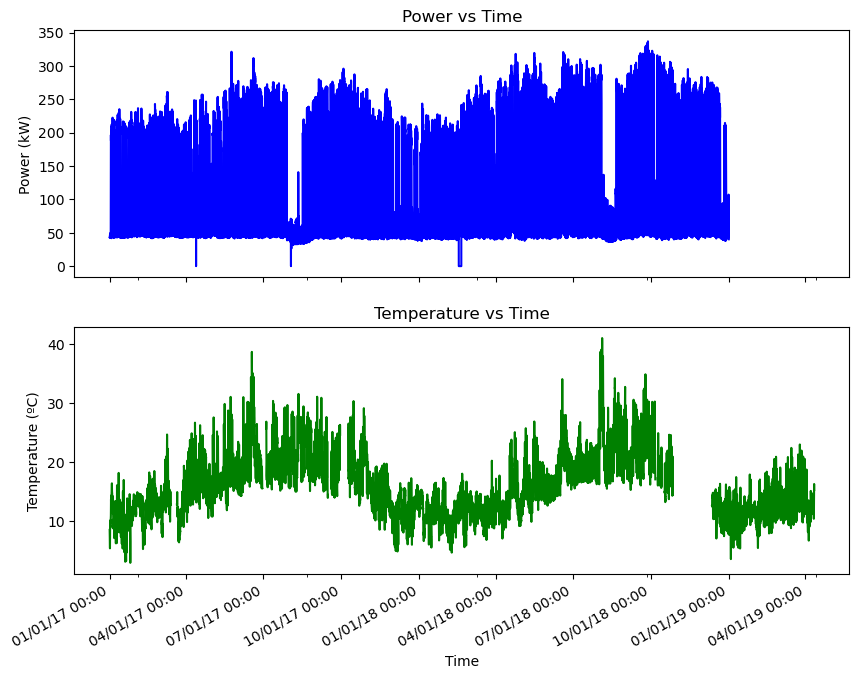

In [30]:
import matplotlib.dates as mpltdates #We have to import this additional library

fig, ax = mplt.subplots(nrows=2, sharex=True)

# plot power and temperature on separate subplots
merged_data['Power (kW)'].plot(ax=ax[0], color='blue')
ax[0].set_ylabel('Power (kW)')
ax[0].set_title('Power vs Time')
merged_data['Temperature (ºC)'].plot(ax=ax[1], color='green')
ax[1].set_ylabel('Temperature (ºC)')
ax[1].set_title('Temperature vs Time')

# set x-axis label and tick format
ax[-1].set_xlabel('Time')
ax[-1].xaxis.set_major_formatter(mpltdates.DateFormatter('%m/%d/%y %H:%M'))

# adjust subplot spacing and size
mplt.subplots_adjust(hspace=0.2)
fig.set_size_inches(10, 8)

# display the plot
mplt.show()

After analyzing the plots, it appears that the power data is complete for the years 2017 and 2018. However, there are gaps in the temperature data during various periods, although the data for 2019 seems to be complete.

To simplify the process, we will split the dataset into two parts: one containing data from 2017 and 2018, which will be used to train our predictive model, and the other containing data from 2019, where we will apply the trained model to obtain our final results.

In [31]:
# Set a variable with the cut-off date for the 2019 set
test_cutoff_date = '2019-01-01'

# Split the dataset into training and test sets
df_data = merged_data.loc[merged_data.index < test_cutoff_date] #dataset with values from 2017 and 2018
df_19 = merged_data.loc[merged_data.index >= test_cutoff_date] #dataset with values from 2019 (which are going to predict)

In [32]:
df_data

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 00:00:00   42.996430          8.532500              74.966667   
2017-01-01 01:00:00   42.751928          7.930000              76.308333   
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   43.897742         12.565000              55.291667   
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2017-01-01 00:00:00          2.344500         3.270750      1029.000000   
2017-01-01 01:00:00          2.692417         3.480333      1028.166667   
2017-01-01 02:00:00          3.300250         4.067167      1028.000000   
2017-01-01 03:00:00          3.534333         4.423583      1028.000000   
2017-01-01 04:00:00          4.006000         5.262333      1028.000000   
...                               ...              ...              ...   
2018-12-31 19:00:00          0.000000         0.000000      1031.000000   
2018-12-31 20:00:00          0.000000         0.000000      1031.000000   
2018-12-31 21:00:00          0.000000         0.000000      1031.000000   
2018-12-31 22:00:00          0.000000         0.000000      1031.000000   
2018-12-31 23:00:00          0.000000         0.000000      1031.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2017-01-01 00:00:00                1.355083          0.0       0.0  
2017-01-01 01:00:00                1.477333          0.0       0.0  
2017-01-01 02:00:00                1.415083          0.0       0.0  
2017-01-01 03:00:00                1.542000          0.0       0.0  
2017-01-01 04:00:00                0.891000          0.0       0.0  
...                                     ...          ...       ...  
2018-12-31 19:00:00                1.112333          0.0       0.0  
2018-12-31 20:00:00                1.322417          0.0       0.0  
2018-12-31 21:00:00                1.195500          0.0       0.0  
2018-12-31 22:00:00                1.117000          0.0       0.0  
2018-12-31 23:00:00                1.388643          0.0       0.0  

[17522 rows x 9 columns]

In [33]:
df_19

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2019-01-01 00:00:00         NaN         10.635833              62.684167   
2019-01-01 01:00:00         NaN         10.377500              62.836667   
2019-01-01 02:00:00         NaN         10.260833              61.720000   
2019-01-01 03:00:00         NaN          9.666667              63.893333   
2019-01-01 04:00:00         NaN          8.640833              68.034167   
...                         ...               ...                    ...   
2019-04-11 11:00:00         NaN         15.615000              47.215000   
2019-04-11 12:00:00         NaN         15.872500              46.630000   
2019-04-11 13:00:00         NaN         16.315833              45.955833   
2019-04-11 14:00:00         NaN         15.755455              45.820909   
2019-04-11 15:00:00         NaN         15.290000              41.750000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2019-01-01 00:00:00               0.0              0.0      1031.000000   
2019-01-01 01:00:00               0.0              0.0      1031.000000   
2019-01-01 02:00:00               0.0              0.0      1031.083333   
2019-01-01 03:00:00               0.0              0.0      1031.083333   
2019-01-01 04:00:00               0.0              0.0      1031.000000   
...                               ...              ...              ...   
2019-04-11 11:00:00               0.0              0.0      1022.083333   
2019-04-11 12:00:00               0.0              0.0      1022.000000   
2019-04-11 13:00:00               0.0              0.0      1021.416667   
2019-04-11 14:00:00               0.0              0.0      1021.090909   
2019-04-11 15:00:00               0.0              0.0      1021.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2019-01-01 00:00:00                2.543250          0.0       0.0  
2019-01-01 01:00:00                1.728667          0.0       0.0  
2019-01-01 02:00:00                2.674750          0.0       0.0  
2019-01-01 03:00:00                2.444250          0.0       0.0  
2019-01-01 04:00:00                3.056333          0.0       0.0  
...                                     ...          ...       ...  
2019-04-11 11:00:00              869.200000          0.0       0.0  
2019-04-11 12:00:00              640.591667          0.0       0.0  
2019-04-11 13:00:00              855.808333          0.0       0.0  
2019-04-11 14:00:00              625.072727          0.0       0.0  
2019-04-11 15:00:00              519.750000          0.0       0.0  

[2416 rows x 9 columns]

**Completing Data**

In [34]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17522 entries, 2017-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Power (kW)              17520 non-null  float64
 1   Temperature (ºC)        15386 non-null  float64
 2   Relative Humidity (%)   15386 non-null  float64
 3   Wind Speed (m/s)        15386 non-null  float64
 4   Wind Gust (m/s)         15386 non-null  float64
 5   Pressure (mbar)         15386 non-null  float64
 6   Solar Radiation (W/m2)  15386 non-null  float64
 7   Rain (mm/h)             15386 non-null  float64
 8   Rain Day                15386 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In our datasets for 2017 and 2018, approximately 12% of the weather data is missing. While we could attempt to fill in these gaps by sourcing data online and importing values or even interpolating, the available data may not align perfectly with what we already possess, complicating the project. Given the abundance of data at our disposal, I've chosen a simpler approach: removing rows with missing data and solely utilizing the existing dataset for model training. This decision ensures that we have sufficient data to achieve satisfactory results without introducing unnecessary complexity.

**Deleting NANs**

Now, we have to clean our data by deleting the rows with any missing numbers (NANs). For the first dataset, df_data, any row containing a single missing value is deleted. Regarding the second one, df_19, any row containing any NaN apart from the Power (kW) is deleted.

In [35]:
df_data = df_data.dropna() #Clean the first dataframe
df_19 = df_19.dropna(subset=df_19.columns.difference(['Power (kW)']), how='any') #Clean the second dataframe

**Final Dataframes**

In [36]:
df_data

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 00:00:00   42.996430          8.532500              74.966667   
2017-01-01 01:00:00   42.751928          7.930000              76.308333   
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   43.897742         12.565000              55.291667   
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2017-01-01 00:00:00          2.344500         3.270750      1029.000000   
2017-01-01 01:00:00          2.692417         3.480333      1028.166667   
2017-01-01 02:00:00          3.300250         4.067167      1028.000000   
2017-01-01 03:00:00          3.534333         4.423583      1028.000000   
2017-01-01 04:00:00          4.006000         5.262333      1028.000000   
...                               ...              ...              ...   
2018-12-31 19:00:00          0.000000         0.000000      1031.000000   
2018-12-31 20:00:00          0.000000         0.000000      1031.000000   
2018-12-31 21:00:00          0.000000         0.000000      1031.000000   
2018-12-31 22:00:00          0.000000         0.000000      1031.000000   
2018-12-31 23:00:00          0.000000         0.000000      1031.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2017-01-01 00:00:00                1.355083          0.0       0.0  
2017-01-01 01:00:00                1.477333          0.0       0.0  
2017-01-01 02:00:00                1.415083          0.0       0.0  
2017-01-01 03:00:00                1.542000          0.0       0.0  
2017-01-01 04:00:00                0.891000          0.0       0.0  
...                                     ...          ...       ...  
2018-12-31 19:00:00                1.112333          0.0       0.0  
2018-12-31 20:00:00                1.322417          0.0       0.0  
2018-12-31 21:00:00                1.195500          0.0       0.0  
2018-12-31 22:00:00                1.117000          0.0       0.0  
2018-12-31 23:00:00                1.388643          0.0       0.0  

[15384 rows x 9 columns]

In [37]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15384 entries, 2017-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Power (kW)              15384 non-null  float64
 1   Temperature (ºC)        15384 non-null  float64
 2   Relative Humidity (%)   15384 non-null  float64
 3   Wind Speed (m/s)        15384 non-null  float64
 4   Wind Gust (m/s)         15384 non-null  float64
 5   Pressure (mbar)         15384 non-null  float64
 6   Solar Radiation (W/m2)  15384 non-null  float64
 7   Rain (mm/h)             15384 non-null  float64
 8   Rain Day                15384 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## 2 - Exploratory Data Analysis

After the data has been collected, prepared and cleaned (managed), it's time to make an Exploratory Data Analysis.

So far, our approach has been to work with the data as provided, simply removing rows containing missing values. However, in this section, we will conduct a more comprehensive examination of the data, specifically addressing potential outliers. Our goal is to refine the dataset to contain only realistic and usable information. Special focus will be placed on the df_data, which comprises data from previous years.

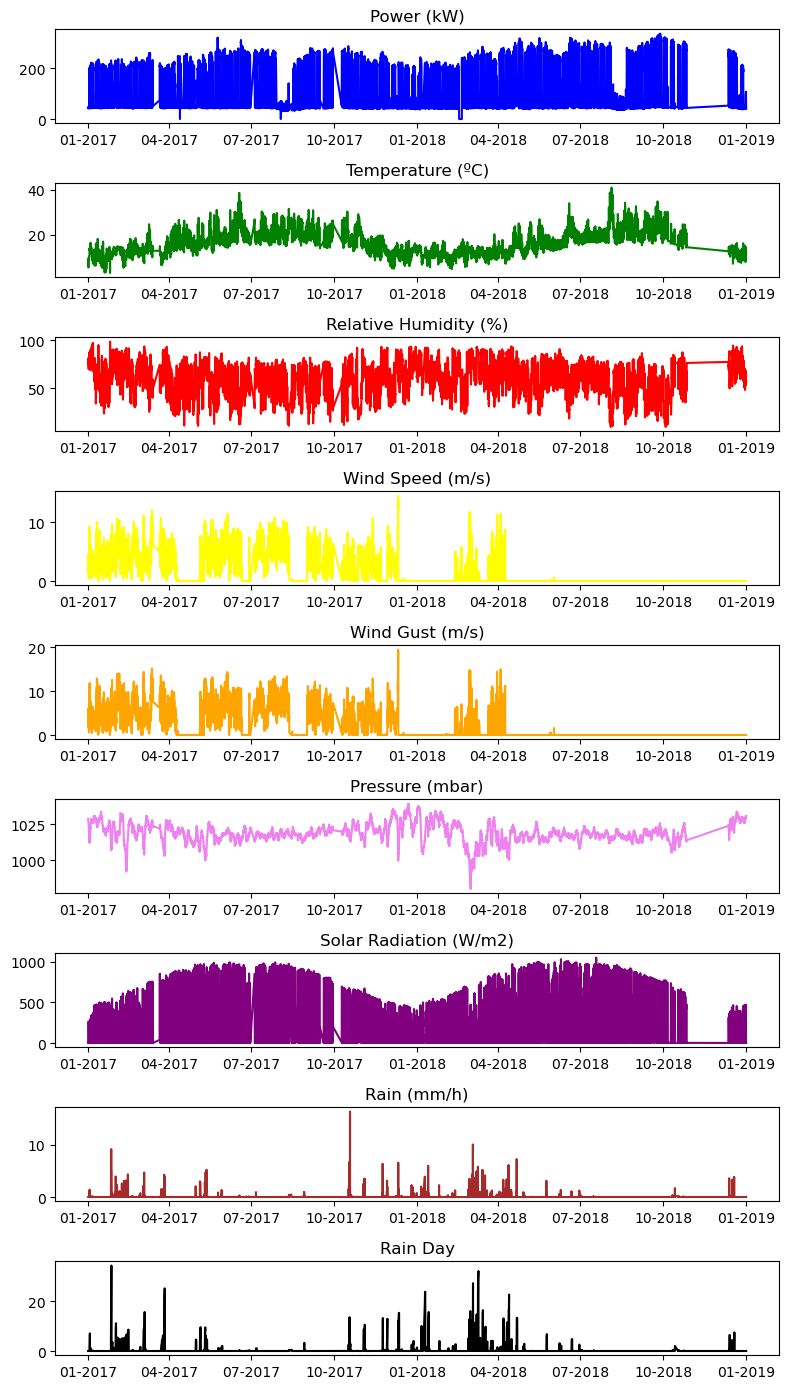

In [38]:
fig, axs = mplt.subplots(nrows=9, ncols=1, figsize=(8, 14))

axs[0].plot(df_data.index, df_data['Power (kW)'], color='blue')
axs[0].set_title('Power (kW)')

axs[1].plot(df_data.index, df_data['Temperature (ºC)'], color='green')
axs[1].set_title('Temperature (ºC)')

axs[2].plot(df_data.index, df_data['Relative Humidity (%)'], color='red')
axs[2].set_title('Relative Humidity (%)')

axs[3].plot(df_data.index, df_data['Wind Speed (m/s)'], color='yellow')
axs[3].set_title('Wind Speed (m/s)')

axs[4].plot(df_data.index, df_data['Wind Gust (m/s)'], color='orange')
axs[4].set_title('Wind Gust (m/s)')

axs[5].plot(df_data.index, df_data['Pressure (mbar)'], color='violet')
axs[5].set_title('Pressure (mbar)')

axs[6].plot(df_data.index, df_data['Solar Radiation (W/m2)'], color='purple')
axs[6].set_title('Solar Radiation (W/m2)')

axs[7].plot(df_data.index, df_data['Rain (mm/h)'], color='brown')
axs[7].set_title('Rain (mm/h)')

axs[8].plot(df_data.index, df_data['Rain Day'], color='black')
axs[8].set_title('Rain Day')

# format x-axis as year-month
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mpltdates.DateFormatter('%m-%Y'))

mplt.tight_layout()
mplt.show()

### 2.1 - Quick Statistics

In [39]:
df_data.describe()

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
count  15384.000000      15384.000000           15384.000000   
mean     108.603826         16.274083              60.007053   
std       84.860278          5.219932              17.333814   
min        0.000000          2.948417               9.680833   
25%       45.379664         12.369808              48.088333   
50%       54.682029         15.880833              62.274583   
75%      190.809768         19.453750              73.177083   
max      337.025762         41.048333              98.625000   

       Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
count      15384.000000     15384.000000     15384.000000   
mean           1.771639         2.277519      1018.992451   
std            2.573457         3.280862         6.604565   
min            0.000000         0.000000       979.916667   
25%            0.000000         0.000000      1015.833333   
50%            0.000000         0.000000      1019.000000   
75%            3.520833         4.486583      1022.583333   
max           14.568333        19.414167      1039.583333   

       Solar Radiation (W/m2)   Rain (mm/h)      Rain Day  
count            15384.000000  15384.000000  15384.000000  
mean               207.484573      0.050812      0.601167  
std                285.129373      0.377040      2.544356  
min                  0.000000      0.000000      0.000000  
25%                  1.697833      0.000000      0.000000  
50%                 17.201833      0.000000      0.000000  
75%                375.812500      0.000000      0.000000  
max               1053.825000     16.408333     34.500000

The value 0 in the Power Consumption columns (Power (kW)) is probably an outlier. The rest seems ok but we need to check more deeply.

### 2.2 - Explore Data

**Check for outliers visually**

**Power**

In [40]:
df_sort_kW = df_data.sort_values(by = 'Power (kW)', ascending = False)
df_sort_kW [:10] # view first 10 entries

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2018-09-27 15:00:00  337.025762         29.984167              29.925833   
2018-09-27 16:00:00  336.772520         29.600000              30.252500   
2018-09-26 16:00:00  334.446806         29.580833              30.550000   
2018-09-27 14:00:00  331.142868         29.097500              31.530833   
2018-09-25 15:00:00  330.674404         27.563333              28.271667   
2018-09-26 17:00:00  329.629319         29.320000              29.309167   
2018-09-24 15:00:00  329.225530         34.045833              16.925000   
2018-09-24 14:00:00  328.993046         32.901667              18.711667   
2018-09-24 16:00:00  328.797926         34.907500              15.900000   
2018-09-26 15:00:00  328.458596         30.604167              29.075000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2018-09-27 15:00:00               0.0              0.0      1023.000000   
2018-09-27 16:00:00               0.0              0.0      1022.250000   
2018-09-26 16:00:00               0.0              0.0      1021.000000   
2018-09-27 14:00:00               0.0              0.0      1023.666667   
2018-09-25 15:00:00               0.0              0.0      1018.333333   
2018-09-26 17:00:00               0.0              0.0      1021.000000   
2018-09-24 15:00:00               0.0              0.0      1018.166667   
2018-09-24 14:00:00               0.0              0.0      1019.000000   
2018-09-24 16:00:00               0.0              0.0      1017.750000   
2018-09-26 15:00:00               0.0              0.0      1021.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2018-09-27 15:00:00              624.425000          0.0       0.0  
2018-09-27 16:00:00              475.183333          0.0       0.0  
2018-09-26 16:00:00              482.516667          0.0       0.0  
2018-09-27 14:00:00              717.075000          0.0       0.0  
2018-09-25 15:00:00              643.666667          0.0       0.0  
2018-09-26 17:00:00              304.233333          0.0       0.0  
2018-09-24 15:00:00              660.016667          0.0       0.0  
2018-09-24 14:00:00              747.416667          0.0       0.0  
2018-09-24 16:00:00              517.025000          0.0       0.0  
2018-09-26 15:00:00              631.558333          0.0       0.0

There are no obvious outliers

In [41]:
df_sort_kW = df_data.sort_values(by = 'Power (kW)', ascending = True)
df_sort_kW [:10] # view first 10 entries

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2018-02-17 08:00:00         0.0         10.860000              86.050000   
2018-02-17 09:00:00         0.0         11.336667              83.975000   
2018-02-17 10:00:00         0.0         10.208333              85.475000   
2018-02-17 11:00:00         0.0         10.143333              86.783333   
2018-02-17 12:00:00         0.0         11.067500              87.266667   
2018-02-17 13:00:00         0.0         12.298333              84.391667   
2018-02-17 14:00:00         0.0         13.560833              71.630000   
2018-02-17 15:00:00         0.0         13.681667              66.945833   
2018-02-17 16:00:00         0.0         14.218333              63.120833   
2018-02-17 17:00:00         0.0         13.388182              66.682727   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2018-02-17 08:00:00          0.489167         0.775583      1025.000000   
2018-02-17 09:00:00          1.137333         1.656083      1026.000000   
2018-02-17 10:00:00          1.588083         2.222333      1026.000000   
2018-02-17 11:00:00          0.725083         0.922500      1026.000000   
2018-02-17 12:00:00          0.929500         1.299917      1025.833333   
2018-02-17 13:00:00          0.145083         0.272500      1025.000000   
2018-02-17 14:00:00          0.000000         0.000000      1024.250000   
2018-02-17 15:00:00          0.000000         0.000000      1024.000000   
2018-02-17 16:00:00          0.000000         0.000000      1024.000000   
2018-02-17 17:00:00          0.000000         0.000000      1024.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2018-02-17 08:00:00               79.886667          0.0       0.0  
2018-02-17 09:00:00              140.525000          0.0       0.0  
2018-02-17 10:00:00              119.533333          0.0       0.0  
2018-02-17 11:00:00               95.544167          0.0       0.0  
2018-02-17 12:00:00              187.208333          0.0       0.0  
2018-02-17 13:00:00              180.891667          0.0       0.0  
2018-02-17 14:00:00              373.008333          0.0       0.0  
2018-02-17 15:00:00              323.108333          0.0       0.0  
2018-02-17 16:00:00              238.441667          0.0       0.0  
2018-02-17 17:00:00               55.952727          0.0       0.0

To clarify if Power (kW) = 0 should be excluded or not, we should count them to see if they actually represent unrealistic values or energy shutdown in North Tower

In [42]:
zero_entries_count = (df_data['Power (kW)'] == 0).sum()
print("Number of entries with Power (kW) equal to zero:", zero_entries_count)

Number of entries with Power (kW) equal to zero: 79


These cases represent 0.5% of the data we have, so even if they are true and the Tower was "turned off", that does not represent good data for predictions since those are specific events and do not depend on other variables.

Now, excluding the data points in which the power consumption is null, let's see which points have the lowest power consumption

In [43]:
df_sort_kW = df_data[df_data['Power (kW)'] != 0].sort_values(by='Power (kW)', ascending=True)
df_sort_kW [:10]

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-08-03 06:00:00   26.350881         18.796667              74.600000   
2017-08-03 05:00:00   26.526118         18.595000              75.158333   
2017-08-03 03:00:00   26.550372         18.780000              74.266667   
2017-08-03 04:00:00   26.658966         18.712500              74.608333   
2017-08-03 02:00:00   26.976010         18.770833              73.850000   
2017-08-03 01:00:00   27.118035         18.792500              71.475000   
2017-08-03 07:00:00   27.352922         19.620833              72.316667   
2017-08-03 00:00:00   30.781843         18.858333              71.191667   
2017-08-05 03:00:00   31.492405         18.706667              79.958333   
2017-08-05 05:00:00   31.696047         18.705000              78.175000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2017-08-03 06:00:00          3.181500         4.088250      1021.000000   
2017-08-03 05:00:00          4.322167         5.534750      1020.666667   
2017-08-03 03:00:00          5.116750         6.708667      1020.000000   
2017-08-03 04:00:00          5.117333         6.499000      1020.083333   
2017-08-03 02:00:00          5.241167         6.583417      1020.916667   
2017-08-03 01:00:00          4.533833         5.681167      1021.000000   
2017-08-03 07:00:00          5.029833         6.206000      1021.083333   
2017-08-03 00:00:00          4.949583         6.288917      1021.000000   
2017-08-05 03:00:00          7.067500         9.036750      1017.000000   
2017-08-05 05:00:00          6.208583         7.946500      1017.416667   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2017-08-03 06:00:00               90.952500          0.0       0.0  
2017-08-03 05:00:00                7.305417          0.0       0.0  
2017-08-03 03:00:00                4.857667          0.0       0.0  
2017-08-03 04:00:00                4.754250          0.0       0.0  
2017-08-03 02:00:00                5.273750          0.0       0.0  
2017-08-03 01:00:00                5.508833          0.0       0.0  
2017-08-03 07:00:00              288.166667          0.0       0.0  
2017-08-03 00:00:00                4.816750          0.0       0.0  
2017-08-05 03:00:00                4.274500          0.0       0.0  
2017-08-05 05:00:00                6.752417          0.0       0.0

Analysing the values, we can notice that the values are "continuous", starting around Power (kW) = 26. That is, there are a lot of points with similar values.

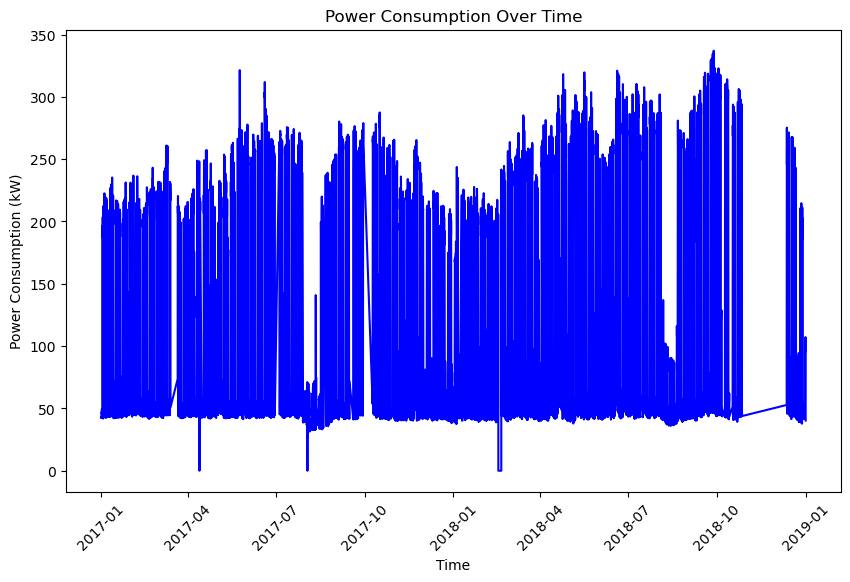

In [44]:
# Set the figure size
mplt.figure(figsize=(10, 6))

# Create a line plot of power consumption over time
mplt.plot(df_data.index, df_data['Power (kW)'], color='blue')

# Add title and axis labels
mplt.title('Power Consumption Over Time')
mplt.xlabel('Time')
mplt.ylabel('Power Consumption (kW)')

# Rotate x-axis labels for better readability
mplt.xticks(rotation=45)

# Show the plot
mplt.show()


As explained before, the 0 values are not good data for predictions since those are most likely specific events and do not depend on other variables. Apart from that, the other values seem ok despite not being easy to understand yet.

I also tried to divide the plot in two to show separate years (2017 and 2018) but it doesn't change much in terms of visualization.

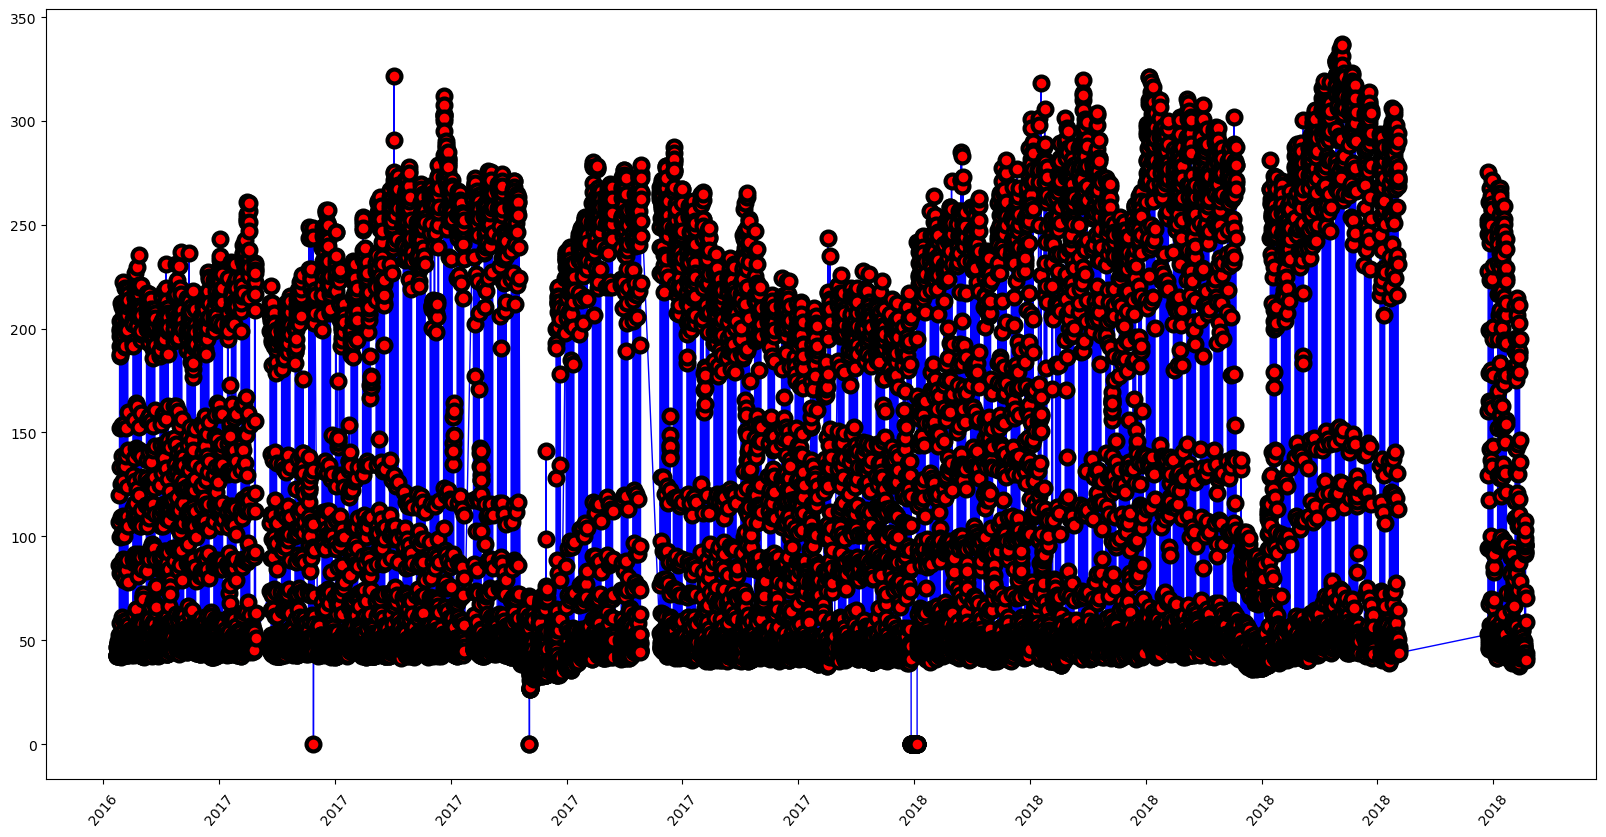

In [45]:
import matplotlib.ticker as ticker

# Create a figure and axes object
fig, ax = mplt.subplots(figsize=(20, 10))

# Set the major tick locator for the x-axis (ticks every 60 units)
ax.xaxis.set_major_locator(ticker.MultipleLocator(60))

# Set parameters for major ticks on the x-axis (padding, label rotation)
ax.xaxis.set_tick_params(which='major', pad=5, labelrotation=50)

# Plot the data
mplt.plot(df_data['Power (kW)'], '-o', color='blue',
         markersize=10, linewidth=1,
         markerfacecolor='red', markeredgecolor='black', markeredgewidth=3)



Despite using a more complex time series plot, we can't scrutinize much more than we did from the previous plot.

**Temperature**

Up until now, the second most important feature after Power should be Temperature, so we also need to look for outliers here. The remaining variables in the dataset are not expected to significantly influence the final results and do not exhibit many outliers. To maintain efficiency and speed in our Jupyter notebook, we will skip analyzing them in this step.

In [46]:
df_sort_kW = df_data.sort_values(by = 'Temperature (ºC)', ascending = False)
df_sort_kW [:10] # view first 10 entries

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2018-08-04 15:00:00   58.734766         41.048333              13.688333   
2018-08-04 16:00:00   58.667687         40.415833              14.172500   
2018-08-04 17:00:00   57.401043         40.311667              11.470000   
2018-08-04 14:00:00   56.916410         40.038333              13.565833   
2018-08-03 16:00:00  270.063597         39.090000              10.032500   
2018-08-03 17:00:00  271.387706         38.956667               9.680833   
2018-08-04 13:00:00   55.799438         38.921667              14.541667   
2018-08-03 14:00:00  287.234856         38.770833              13.241667   
2018-08-02 17:00:00  288.664501         38.745000              16.108333   
2017-06-17 15:00:00   54.044227         38.708333              12.520000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2018-08-04 15:00:00          0.000000         0.000000      1015.000000   
2018-08-04 16:00:00          0.000000         0.000000      1014.750000   
2018-08-04 17:00:00          0.000000         0.000000      1014.000000   
2018-08-04 14:00:00          0.000000         0.000000      1015.583333   
2018-08-03 16:00:00          0.000000         0.000000      1015.000000   
2018-08-03 17:00:00          0.000000         0.000000      1015.000000   
2018-08-04 13:00:00          0.000000         0.000000      1016.000000   
2018-08-03 14:00:00          0.000000         0.000000      1015.916667   
2018-08-02 17:00:00          0.000000         0.000000      1012.000000   
2017-06-17 15:00:00          1.956917         2.620583      1012.583333   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2018-08-04 15:00:00              785.666667          0.0       0.0  
2018-08-04 16:00:00              662.983333          0.0       0.0  
2018-08-04 17:00:00              516.133333          0.0       0.0  
2018-08-04 14:00:00              854.250000          0.0       0.0  
2018-08-03 16:00:00              692.775000          0.0       0.0  
2018-08-03 17:00:00              529.591667          0.0       0.0  
2018-08-04 13:00:00              879.083333          0.0       0.0  
2018-08-03 14:00:00              881.000000          0.0       0.0  
2018-08-02 17:00:00              531.433333          0.0       0.0  
2017-06-17 15:00:00              753.775000          0.0       0.0

In [47]:
df_sort_kW = df_data.sort_values(by = 'Temperature (ºC)', ascending = True)
df_sort_kW [:10] # view first 10 entries

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-25 08:00:00  115.660572          2.948417              98.625000   
2017-01-19 08:00:00  116.172954          3.139000              47.252500   
2017-01-19 07:00:00   96.521720          3.139750              47.254167   
2017-01-20 09:00:00  128.625050          3.235667              78.941667   
2017-01-19 09:00:00  127.070205          3.486833              45.850000   
2017-01-19 06:00:00   55.448090          3.586833              45.824167   
2017-01-25 09:00:00  137.926595          3.695833              95.808333   
2017-01-20 06:00:00   57.955377          3.924750              80.766667   
2017-01-19 05:00:00   42.541076          3.956750              38.978333   
2017-01-20 07:00:00   94.484863          4.202500              73.912500   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2017-01-25 08:00:00          1.044750         1.362583      1024.916667   
2017-01-19 08:00:00          4.877833         6.058667      1022.000000   
2017-01-19 07:00:00          5.110333         6.499583      1021.583333   
2017-01-20 09:00:00          2.550667         3.228667      1019.416667   
2017-01-19 09:00:00          5.410500         6.710167      1022.000000   
2017-01-19 06:00:00          5.338917         6.729000      1021.083333   
2017-01-25 09:00:00          1.336417         1.803167      1025.000000   
2017-01-20 06:00:00          1.022000         1.404667      1018.000000   
2017-01-19 05:00:00          5.276083         6.562417      1021.000000   
2017-01-20 07:00:00          2.620667         3.102750      1018.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2017-01-25 08:00:00               63.795833          0.0       0.0  
2017-01-19 08:00:00               69.212750          0.0       0.0  
2017-01-19 07:00:00                1.505583          0.0       0.0  
2017-01-20 09:00:00              205.066667          0.0       0.0  
2017-01-19 09:00:00              221.450000          0.0       0.0  
2017-01-19 06:00:00                0.457167          0.0       0.0  
2017-01-25 09:00:00              186.708333          0.0       0.0  
2017-01-20 06:00:00                1.313750          0.0       0.0  
2017-01-19 05:00:00                0.551833          0.0       0.0  
2017-01-20 07:00:00                2.276917          0.0       0.0

The values seem reasonable, with the 4th of August of 2018 having the highest temperatures. For colder temperatures the values also seem normal, in terms of weather in Lisbon.

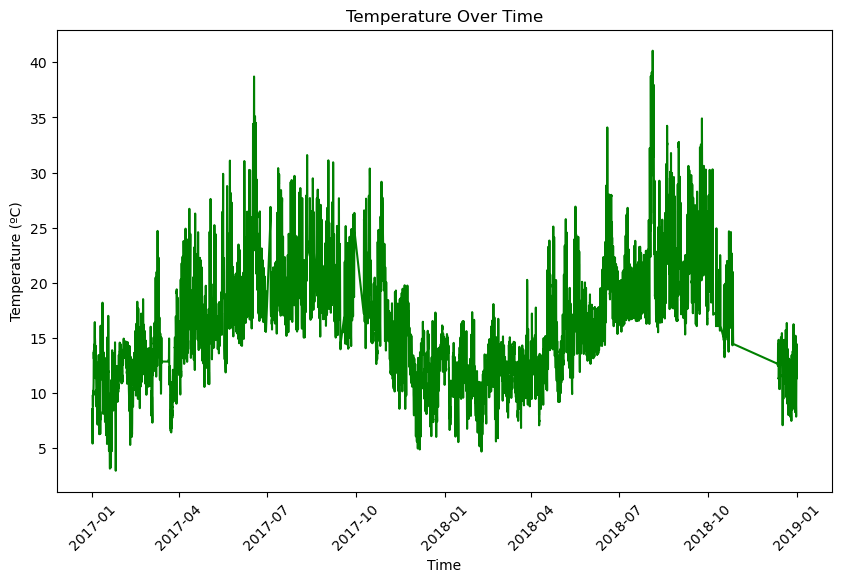

In [48]:
# Set the figure size
mplt.figure(figsize=(10, 6))

# Create a line plot of power consumption over time
mplt.plot(df_data.index, df_data['Temperature (ºC)'], color='green')

# Add title and axis labels
mplt.title('Temperature Over Time')
mplt.xlabel('Time')
mplt.ylabel('Temperature (ºC)')

# Rotate x-axis labels for better readability
mplt.xticks(rotation=45)

# Show the plot
mplt.show()

**Histogram**

We will begin our data analysis using histograms as the first method. This approach allows us to visualize the distribution of the data and identify any outliers present.

{'whiskers': [<matplotlib.lines.Line2D at 0x23c9a62b850>,
 'caps': [<matplotlib.lines.Line2D at 0x23c997b9350>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c9a593990>],
 'medians': [<matplotlib.lines.Line2D at 0x23c99796090>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c9a583790>],
 'means': []}

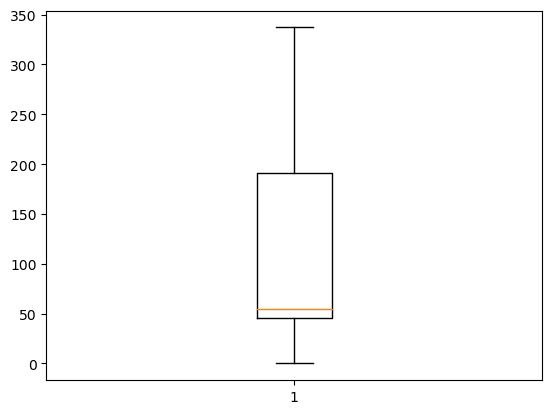

In [49]:
mplt.boxplot(df_data['Power (kW)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23c99796590>,
 'caps': [<matplotlib.lines.Line2D at 0x23c997cb110>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c997c86d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23c977b0d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c99acee90>],
 'means': []}

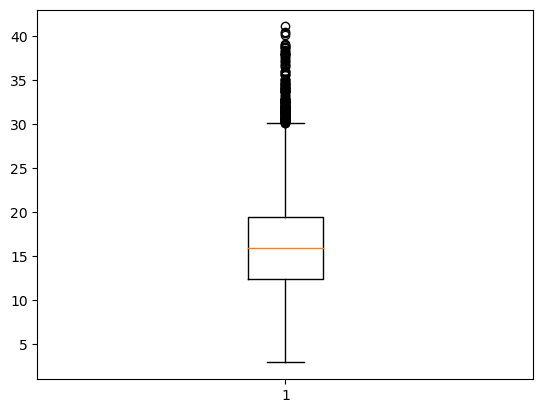

In [50]:
mplt.boxplot(df_data['Temperature (ºC)'])

<Axes: xlabel='Power (kW)'>

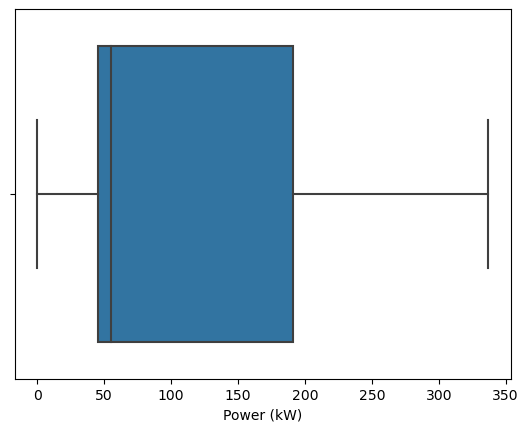

In [51]:
sb.boxplot(x=df_data['Power (kW)']) # Bloxplot using seaborn

These boxplots confirm the comments made above.

### 2.3 - Outliers Removal

In this stage, we will explore various methods: Z-score, IQR, and interpolation. Subsequently, we will evaluate which of these methods yields the most effective results for this dataset. It's important to note that while we aim to remove some outliers, we also want to ensure that we don't excessively delete data in the process.

**Calculate Z-score**

Measures how many standard deviations a data point is from the mean of the dataset; data points with a Z-score greater than a certain threshold are considered outliers.

In [52]:
from scipy import stats
#import numpy as np
z = np.abs(stats.zscore(df_data['Power (kW)']))
z

2017-01-01 00:00:00    0.773148
2017-01-01 01:00:00    0.776029
2017-01-01 02:00:00    0.774734
2017-01-01 03:00:00    0.781145
2017-01-01 04:00:00    0.777190
                         ...   
2018-12-31 19:00:00    0.453368
2018-12-31 20:00:00    0.588543
2018-12-31 21:00:00    0.762526
2018-12-31 22:00:00    0.787147
2018-12-31 23:00:00    0.805700
Name: Power (kW), Length: 15384, dtype: float64

In [53]:
threshold = 3 # 3 sigma...Includes 99.7% of the data
print(z>3)
print(np.where(z > 3))

2017-01-01 00:00:00    False
2017-01-01 01:00:00    False
2017-01-01 02:00:00    False
2017-01-01 03:00:00    False
2017-01-01 04:00:00    False
                       ...  
2018-12-31 19:00:00    False
2018-12-31 20:00:00    False
2018-12-31 21:00:00    False
2018-12-31 22:00:00    False
2018-12-31 23:00:00    False
Name: Power (kW), Length: 15384, dtype: bool
(array([], dtype=int64),)


It indicates that there are no data points in the array z that are considered outliers based on the specified threshold of 3 standard deviations from the mean. Therefore, no outliers are detected according to this criteria wich makes sense from what we've seen in the Power (kW) boxplot.

So, there is no need to extend this method as we would get the same values we had previously.

**Calculate IQR**

In [54]:
Q1 = df_data['Power (kW)'].quantile(0.25)

print(Q1)
Q3 = df_data['Power (kW)'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

45.379664125
190.809768125
145.430104


In [55]:
print((df_data['Power (kW)'] < (Q1 - 1.5 * IQR)) | (df_data['Power (kW)'] > (Q3 + 1.5 * IQR))) 

2017-01-01 00:00:00    False
2017-01-01 01:00:00    False
2017-01-01 02:00:00    False
2017-01-01 03:00:00    False
2017-01-01 04:00:00    False
                       ...  
2018-12-31 19:00:00    False
2018-12-31 20:00:00    False
2018-12-31 21:00:00    False
2018-12-31 22:00:00    False
2018-12-31 23:00:00    False
Name: Power (kW), Length: 15384, dtype: bool


In [56]:
df_IQR = df_data[((df_data['Power (kW)'] > (Q1 - 1.5 * IQR)) & (df_data['Power (kW)'] < (Q3 + 1.5 * IQR)))]
df_IQR

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 00:00:00   42.996430          8.532500              74.966667   
2017-01-01 01:00:00   42.751928          7.930000              76.308333   
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   43.897742         12.565000              55.291667   
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2017-01-01 00:00:00          2.344500         3.270750      1029.000000   
2017-01-01 01:00:00          2.692417         3.480333      1028.166667   
2017-01-01 02:00:00          3.300250         4.067167      1028.000000   
2017-01-01 03:00:00          3.534333         4.423583      1028.000000   
2017-01-01 04:00:00          4.006000         5.262333      1028.000000   
...                               ...              ...              ...   
2018-12-31 19:00:00          0.000000         0.000000      1031.000000   
2018-12-31 20:00:00          0.000000         0.000000      1031.000000   
2018-12-31 21:00:00          0.000000         0.000000      1031.000000   
2018-12-31 22:00:00          0.000000         0.000000      1031.000000   
2018-12-31 23:00:00          0.000000         0.000000      1031.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2017-01-01 00:00:00                1.355083          0.0       0.0  
2017-01-01 01:00:00                1.477333          0.0       0.0  
2017-01-01 02:00:00                1.415083          0.0       0.0  
2017-01-01 03:00:00                1.542000          0.0       0.0  
2017-01-01 04:00:00                0.891000          0.0       0.0  
...                                     ...          ...       ...  
2018-12-31 19:00:00                1.112333          0.0       0.0  
2018-12-31 20:00:00                1.322417          0.0       0.0  
2018-12-31 21:00:00                1.195500          0.0       0.0  
2018-12-31 22:00:00                1.117000          0.0       0.0  
2018-12-31 23:00:00                1.388643          0.0       0.0  

[15384 rows x 9 columns]

Once again, the number of rows remains the same wich means we still have the entire dataframe.

**Clean (Interpolate)  outliers from EDA**

With this method we interpolate the data whenever the value is below a certain treshold. We will try 2 methods: one for values below Q1 and for points under the minimum power consumption, excluding 0 (this corresponds to 26 kW as seen before).


**Q1**

In [57]:
df_data_Q1 = df_data.copy()

In [58]:
df_data_Q1.loc[df_data['Power (kW)'] <=df_data['Power (kW)'].quantile(0.25),'Power (kW)']=df_data['Power (kW)'].quantile(0.25)

In [59]:
df_data_Q1

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 00:00:00   45.379664          8.532500              74.966667   
2017-01-01 01:00:00   45.379664          7.930000              76.308333   
2017-01-01 02:00:00   45.379664          7.263417              80.275000   
2017-01-01 03:00:00   45.379664          6.831333              81.333333   
2017-01-01 04:00:00   45.379664          6.500250              81.241667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   45.379664         12.565000              55.291667   
2018-12-31 22:00:00   45.379664         11.926667              56.530000   
2018-12-31 23:00:00   45.379664         11.338571              58.050000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2017-01-01 00:00:00          2.344500         3.270750      1029.000000   
2017-01-01 01:00:00          2.692417         3.480333      1028.166667   
2017-01-01 02:00:00          3.300250         4.067167      1028.000000   
2017-01-01 03:00:00          3.534333         4.423583      1028.000000   
2017-01-01 04:00:00          4.006000         5.262333      1028.000000   
...                               ...              ...              ...   
2018-12-31 19:00:00          0.000000         0.000000      1031.000000   
2018-12-31 20:00:00          0.000000         0.000000      1031.000000   
2018-12-31 21:00:00          0.000000         0.000000      1031.000000   
2018-12-31 22:00:00          0.000000         0.000000      1031.000000   
2018-12-31 23:00:00          0.000000         0.000000      1031.000000   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2017-01-01 00:00:00                1.355083          0.0       0.0  
2017-01-01 01:00:00                1.477333          0.0       0.0  
2017-01-01 02:00:00                1.415083          0.0       0.0  
2017-01-01 03:00:00                1.542000          0.0       0.0  
2017-01-01 04:00:00                0.891000          0.0       0.0  
...                                     ...          ...       ...  
2018-12-31 19:00:00                1.112333          0.0       0.0  
2018-12-31 20:00:00                1.322417          0.0       0.0  
2018-12-31 21:00:00                1.195500          0.0       0.0  
2018-12-31 22:00:00                1.117000          0.0       0.0  
2018-12-31 23:00:00                1.388643          0.0       0.0  

[15384 rows x 9 columns]

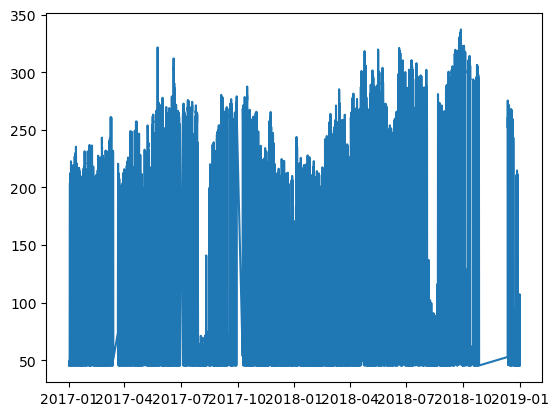

In [60]:
mplt.plot(df_data_Q1['Power (kW)'])

**Minimum Power Consumption ( around 26 kW)**

In [61]:
df_data_minPower = df_data.copy()

In [62]:
# Find the minimum value of 'Power (kW)' excluding zero
min_power = df_data_minPower['Power (kW)'][df_data_minPower['Power (kW)'] != 0].min()

# Apply interpolation with the threshold being the minimum value excluding zero
df_data_minPower['Power (kW)'] = df_data_minPower['Power (kW)'].mask(df_data_minPower['Power (kW)'] < min_power).interpolate(method='time')


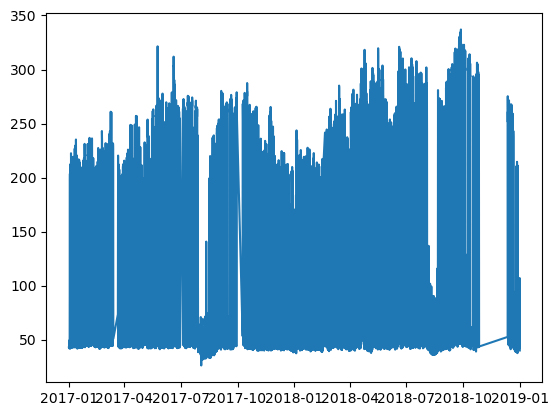

In [63]:
mplt.plot(df_data_minPower['Power (kW)'])

In [64]:
df_sort_minPower = df_data_minPower.sort_values(by = 'Power (kW)', ascending = True)
df_sort_minPower [:10] # view first 10 entries

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-08-03 06:00:00   26.350881         18.796667              74.600000   
2017-08-03 05:00:00   26.526118         18.595000              75.158333   
2017-08-03 03:00:00   26.550372         18.780000              74.266667   
2017-08-03 04:00:00   26.658966         18.712500              74.608333   
2017-08-03 02:00:00   26.976010         18.770833              73.850000   
2017-08-03 01:00:00   27.118035         18.792500              71.475000   
2017-08-03 07:00:00   27.352922         19.620833              72.316667   
2017-08-03 00:00:00   30.781843         18.858333              71.191667   
2017-08-05 03:00:00   31.492405         18.706667              79.958333   
2017-08-05 05:00:00   31.696047         18.705000              78.175000   

                     Wind Speed (m/s)  Wind Gust (m/s)  Pressure (mbar)  \
2017-08-03 06:00:00          3.181500         4.088250      1021.000000   
2017-08-03 05:00:00          4.322167         5.534750      1020.666667   
2017-08-03 03:00:00          5.116750         6.708667      1020.000000   
2017-08-03 04:00:00          5.117333         6.499000      1020.083333   
2017-08-03 02:00:00          5.241167         6.583417      1020.916667   
2017-08-03 01:00:00          4.533833         5.681167      1021.000000   
2017-08-03 07:00:00          5.029833         6.206000      1021.083333   
2017-08-03 00:00:00          4.949583         6.288917      1021.000000   
2017-08-05 03:00:00          7.067500         9.036750      1017.000000   
2017-08-05 05:00:00          6.208583         7.946500      1017.416667   

                     Solar Radiation (W/m2)  Rain (mm/h)  Rain Day  
2017-08-03 06:00:00               90.952500          0.0       0.0  
2017-08-03 05:00:00                7.305417          0.0       0.0  
2017-08-03 03:00:00                4.857667          0.0       0.0  
2017-08-03 04:00:00                4.754250          0.0       0.0  
2017-08-03 02:00:00                5.273750          0.0       0.0  
2017-08-03 01:00:00                5.508833          0.0       0.0  
2017-08-03 07:00:00              288.166667          0.0       0.0  
2017-08-03 00:00:00                4.816750          0.0       0.0  
2017-08-05 03:00:00                4.274500          0.0       0.0  
2017-08-05 05:00:00                6.752417          0.0       0.0

Interpolating the data whenever the value is below the minimum power consumption, excluding 0 (this corresponds to 26 kW as seen before), is clearly the best strategy: using Z-score or IQR is meaningless for this data as we saw above and interpolating for values under Q1 it's just deleting more data.

**Defining the final dataframe**

In [65]:
df_final = df_data_minPower

### 2.4 - EDA Conclusions

After reviewing our data and removing outliers, we need to draw conclusions to prepare it for feature selection. Now, let's recap the features we have so far.

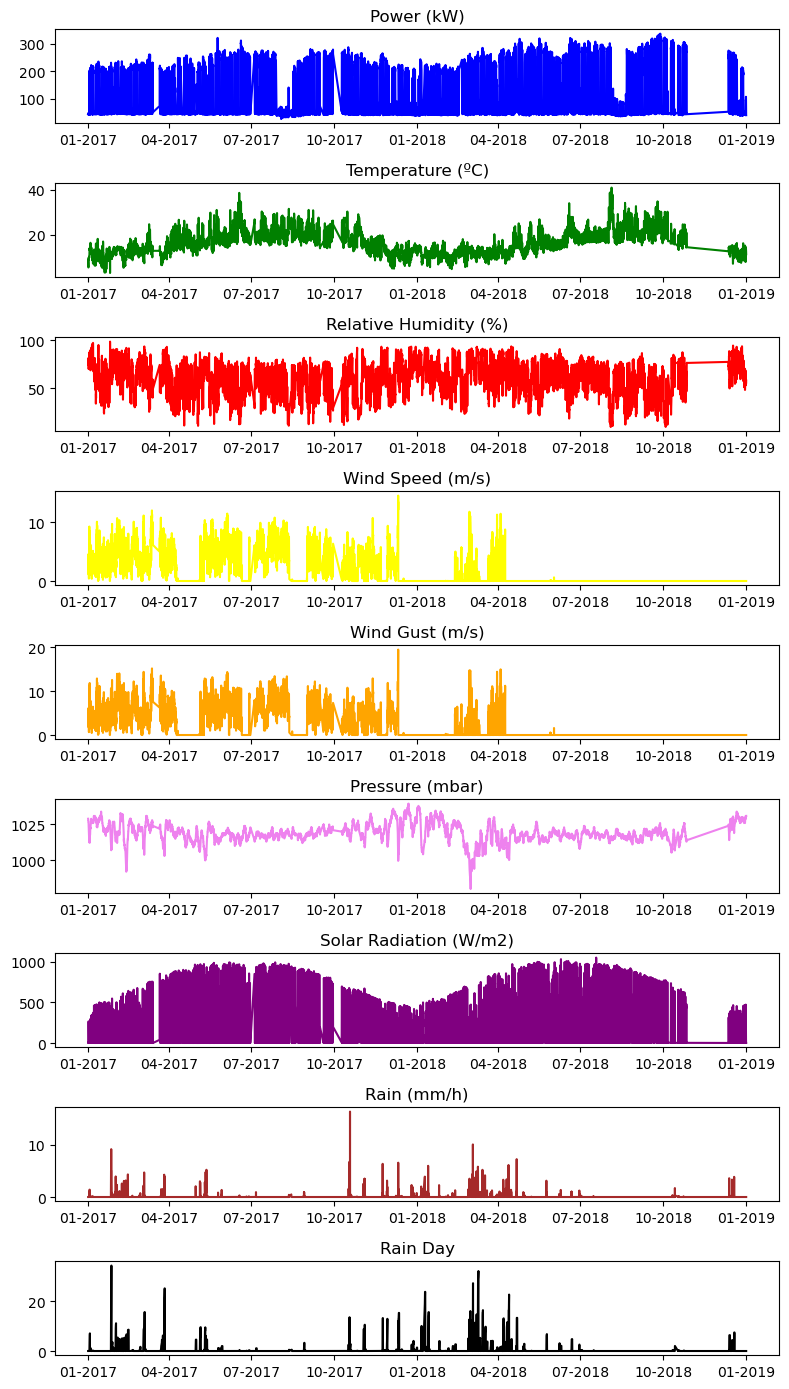

In [66]:
fig, axs = mplt.subplots(nrows=9, ncols=1, figsize=(8, 14))

axs[0].plot(df_final.index, df_final['Power (kW)'], color='blue')
axs[0].set_title('Power (kW)')

axs[1].plot(df_final.index, df_final['Temperature (ºC)'], color='green')
axs[1].set_title('Temperature (ºC)')

axs[2].plot(df_final.index, df_final['Relative Humidity (%)'], color='red')
axs[2].set_title('Relative Humidity (%)')

axs[3].plot(df_final.index, df_final['Wind Speed (m/s)'], color='yellow')
axs[3].set_title('Wind Speed (m/s)')

axs[4].plot(df_final.index, df_final['Wind Gust (m/s)'], color='orange')
axs[4].set_title('Wind Gust (m/s)')

axs[5].plot(df_final.index, df_final['Pressure (mbar)'], color='violet')
axs[5].set_title('Pressure (mbar)')

axs[6].plot(df_final.index, df_final['Solar Radiation (W/m2)'], color='purple')
axs[6].set_title('Solar Radiation (W/m2)')

axs[7].plot(df_final.index, df_final['Rain (mm/h)'], color='brown')
axs[7].set_title('Rain (mm/h)')

axs[8].plot(df_final.index, df_final['Rain Day'], color='black')
axs[8].set_title('Rain Day')

# format x-axis as year-month
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mpltdates.DateFormatter('%m-%Y'))

mplt.tight_layout()
mplt.show()

Looking at the plots, some features might not help much in predicting power usage. For example, Wind Speed and Wind Gust have a bunch of missing values, so they might not be very helpful. The same goes for Rain and Rain Day. Relative Humidity and Pressure might not be super important either, but we will use them in the beginning.

However, Temperature (ºC) appears to be a strong feature for forecasting. We observed that the highest power consumption occurred during high temperatures, and vice versa. Thus, cooling accounts for the highest percentage of energy consumption, making it useful to calculate cooling degree hours (CDH); we can also utilize the heating degree hours (HDH) feature to enhance the model. Typically, peak consumption times align with daylight hours, suggesting that Solar Radiation (W/m2) could also be beneficial for prediction.

In conclusion, Power consumption appears to rely significantly on past values, suggesting that Power-1 and potentially Power-2 could serve as effective predictors. This underscores the continuous nature of power consumption. Additionally, there appears to be a pattern linked to the time of day, day of the week, holidays and months. This observation aligns with the operational hours of the campus, the absence of classes on weekends, and variations in activity levels across different months.

## 3 - Feature Selection

In this part we are going to choose the best features for our model, based on what we found at the Exploratory Data Analysis.

### 3.1 - Feature Engineering

**Feature Selection**

Firstly, we are going to select the features we considered before to be more useful and drop the others

In [67]:
df_final = df_final.drop(['Wind Speed (m/s)', 'Wind Gust (m/s)', 'Rain (mm/h)', 'Rain Day'], axis=1)
df_final.head()

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 00:00:00   42.996430          8.532500              74.966667   
2017-01-01 01:00:00   42.751928          7.930000              76.308333   
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   

                     Pressure (mbar)  Solar Radiation (W/m2)  
2017-01-01 00:00:00      1029.000000                1.355083  
2017-01-01 01:00:00      1028.166667                1.477333  
2017-01-01 02:00:00      1028.000000                1.415083  
2017-01-01 03:00:00      1028.000000                1.542000  
2017-01-01 04:00:00      1028.000000                0.891000

**Feature Engineering**

Now let's create the features we decided to include in the EDA: Power-1, Power-2, Hour, Month, Week Day, Weekend, Holiday, CDH, HDH

**Power-1, Power-2, Hour, Month, Week Day, Weekend**

In [68]:
df_final['Power-1']=df_final['Power (kW)'].shift(1) # Previous hour consumption
df_final['Power-2']=df_final['Power-1'].shift(1) # Second previous hour consumption
df_final['Month'] = df_data.index.month
df_final['Hour'] = df_data.index.hour
df_final['Week Day'] = df_data.index.weekday + 1
df_final['Weekend'] = df_data.index.weekday.isin([5, 6]).astype(int)
df_final

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 00:00:00   42.996430          8.532500              74.966667   
2017-01-01 01:00:00   42.751928          7.930000              76.308333   
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   43.897742         12.565000              55.291667   
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   

                     Pressure (mbar)  Solar Radiation (W/m2)     Power-1  \
2017-01-01 00:00:00      1029.000000                1.355083         NaN   
2017-01-01 01:00:00      1028.166667                1.477333   42.996430   
2017-01-01 02:00:00      1028.000000                1.415083   42.751928   
2017-01-01 03:00:00      1028.000000                1.542000   42.861834   
2017-01-01 04:00:00      1028.000000                0.891000   42.317769   
...                              ...                     ...         ...   
2018-12-31 19:00:00      1031.000000                1.112333  102.898642   
2018-12-31 20:00:00      1031.000000                1.322417   70.132164   
2018-12-31 21:00:00      1031.000000                1.195500   58.661569   
2018-12-31 22:00:00      1031.000000                1.117000   43.897742   
2018-12-31 23:00:00      1031.000000                1.388643   41.808445   

                        Power-2  Month  Hour  Week Day  Weekend  
2017-01-01 00:00:00         NaN      1     0         7        1  
2017-01-01 01:00:00         NaN      1     1         7        1  
2017-01-01 02:00:00   42.996430      1     2         7        1  
2017-01-01 03:00:00   42.751928      1     3         7        1  
2017-01-01 04:00:00   42.861834      1     4         7        1  
...                         ...    ...   ...       ...      ...  
2018-12-31 19:00:00  107.208991     12    19         1        0  
2018-12-31 20:00:00  102.898642     12    20         1        0  
2018-12-31 21:00:00   70.132164     12    21         1        0  
2018-12-31 22:00:00   58.661569     12    22         1        0  
2018-12-31 23:00:00   43.897742     12    23         1        0  

[15384 rows x 11 columns]

**Power Diff Mean**

Tracking the difference between current consumption and the recent mean can help detect emerging trends in energy usage. For example, if the difference consistently increases over time, it may indicate a gradual shift in consumption patterns that could inform long-term planning or resource allocation decisions.

In [69]:
# Calculate the difference between current consumption and the mean of consumption in the last hours
window_size = 3  # Choose the window size to calculate the moving average
df_final['Power Mean'] = df_final['Power (kW)'].rolling(window=window_size).mean()
df_final['Power Diff Mean'] = df_final['Power (kW)'] - df_final['Power Mean']

# Drop the 'Power Mean' column as it is not needed in the dataframe
df_final.drop(columns=['Power Mean'], inplace=True)


In [70]:
df_final

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 00:00:00   42.996430          8.532500              74.966667   
2017-01-01 01:00:00   42.751928          7.930000              76.308333   
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   43.897742         12.565000              55.291667   
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   

                     Pressure (mbar)  Solar Radiation (W/m2)     Power-1  \
2017-01-01 00:00:00      1029.000000                1.355083         NaN   
2017-01-01 01:00:00      1028.166667                1.477333   42.996430   
2017-01-01 02:00:00      1028.000000                1.415083   42.751928   
2017-01-01 03:00:00      1028.000000                1.542000   42.861834   
2017-01-01 04:00:00      1028.000000                0.891000   42.317769   
...                              ...                     ...         ...   
2018-12-31 19:00:00      1031.000000                1.112333  102.898642   
2018-12-31 20:00:00      1031.000000                1.322417   70.132164   
2018-12-31 21:00:00      1031.000000                1.195500   58.661569   
2018-12-31 22:00:00      1031.000000                1.117000   43.897742   
2018-12-31 23:00:00      1031.000000                1.388643   41.808445   

                        Power-2  Month  Hour  Week Day  Weekend  \
2017-01-01 00:00:00         NaN      1     0         7        1   
2017-01-01 01:00:00         NaN      1     1         7        1   
2017-01-01 02:00:00   42.996430      1     2         7        1   
2017-01-01 03:00:00   42.751928      1     3         7        1   
2017-01-01 04:00:00   42.861834      1     4         7        1   
...                         ...    ...   ...       ...      ...   
2018-12-31 19:00:00  107.208991     12    19         1        0   
2018-12-31 20:00:00  102.898642     12    20         1        0   
2018-12-31 21:00:00   70.132164     12    21         1        0   
2018-12-31 22:00:00   58.661569     12    22         1        0   
2018-12-31 23:00:00   43.897742     12    23         1        0   

                     Power Diff Mean  
2017-01-01 00:00:00              NaN  
2017-01-01 01:00:00              NaN  
2017-01-01 02:00:00        -0.008230  
2017-01-01 03:00:00        -0.326075  
2017-01-01 04:00:00         0.042389  
...                              ...  
2018-12-31 19:00:00       -23.281102  
2018-12-31 20:00:00       -18.569223  
2018-12-31 21:00:00       -13.666083  
2018-12-31 22:00:00        -6.314140  
2018-12-31 23:00:00        -1.745961  

[15384 rows x 12 columns]

We need to clean the NaNs in Power-1 and Power-2 columns

In [71]:
df_final = df_final.dropna()

In [72]:
df_final

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
2017-01-01 05:00:00   42.437725          6.006417              81.008333   
2017-01-01 06:00:00   42.307281          5.645833              80.441667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   43.897742         12.565000              55.291667   
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   

                     Pressure (mbar)  Solar Radiation (W/m2)     Power-1  \
2017-01-01 02:00:00           1028.0                1.415083   42.751928   
2017-01-01 03:00:00           1028.0                1.542000   42.861834   
2017-01-01 04:00:00           1028.0                0.891000   42.317769   
2017-01-01 05:00:00           1028.0                1.375833   42.653385   
2017-01-01 06:00:00           1027.0                0.988000   42.437725   
...                              ...                     ...         ...   
2018-12-31 19:00:00           1031.0                1.112333  102.898642   
2018-12-31 20:00:00           1031.0                1.322417   70.132164   
2018-12-31 21:00:00           1031.0                1.195500   58.661569   
2018-12-31 22:00:00           1031.0                1.117000   43.897742   
2018-12-31 23:00:00           1031.0                1.388643   41.808445   

                        Power-2  Month  Hour  Week Day  Weekend  \
2017-01-01 02:00:00   42.996430      1     2         7        1   
2017-01-01 03:00:00   42.751928      1     3         7        1   
2017-01-01 04:00:00   42.861834      1     4         7        1   
2017-01-01 05:00:00   42.317769      1     5         7        1   
2017-01-01 06:00:00   42.653385      1     6         7        1   
...                         ...    ...   ...       ...      ...   
2018-12-31 19:00:00  107.208991     12    19         1        0   
2018-12-31 20:00:00  102.898642     12    20         1        0   
2018-12-31 21:00:00   70.132164     12    21         1        0   
2018-12-31 22:00:00   58.661569     12    22         1        0   
2018-12-31 23:00:00   43.897742     12    23         1        0   

                     Power Diff Mean  
2017-01-01 02:00:00        -0.008230  
2017-01-01 03:00:00        -0.326075  
2017-01-01 04:00:00         0.042389  
2017-01-01 05:00:00        -0.031901  
2017-01-01 06:00:00        -0.158849  
...                              ...  
2018-12-31 19:00:00       -23.281102  
2018-12-31 20:00:00       -18.569223  
2018-12-31 21:00:00       -13.666083  
2018-12-31 22:00:00        -6.314140  
2018-12-31 23:00:00        -1.745961  

[15382 rows x 12 columns]

**Holiday**

We need to add the Lisbon, Portugal Holidays to our datasets since the university is closed at that time.

In [73]:
import holidays

# Get the list of holidays in Portugal for the year of the dataset
pt_holidays = holidays.Portugal()

# Define a function to check if a date is a holiday in Portugal
def is_holiday(date):
    if date in pt_holidays:
        return 1
    else:
        return 0

# Apply the function to each row of the DataFrame to create a new column "Holiday"
df_final['Holiday'] = df_final.index.map(is_holiday)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12504\4217745212.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Holiday'] = df_final.index.map(is_holiday)


In [74]:
df_final

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
2017-01-01 05:00:00   42.437725          6.006417              81.008333   
2017-01-01 06:00:00   42.307281          5.645833              80.441667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   43.897742         12.565000              55.291667   
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   

                     Pressure (mbar)  Solar Radiation (W/m2)     Power-1  \
2017-01-01 02:00:00           1028.0                1.415083   42.751928   
2017-01-01 03:00:00           1028.0                1.542000   42.861834   
2017-01-01 04:00:00           1028.0                0.891000   42.317769   
2017-01-01 05:00:00           1028.0                1.375833   42.653385   
2017-01-01 06:00:00           1027.0                0.988000   42.437725   
...                              ...                     ...         ...   
2018-12-31 19:00:00           1031.0                1.112333  102.898642   
2018-12-31 20:00:00           1031.0                1.322417   70.132164   
2018-12-31 21:00:00           1031.0                1.195500   58.661569   
2018-12-31 22:00:00           1031.0                1.117000   43.897742   
2018-12-31 23:00:00           1031.0                1.388643   41.808445   

                        Power-2  Month  Hour  Week Day  Weekend  \
2017-01-01 02:00:00   42.996430      1     2         7        1   
2017-01-01 03:00:00   42.751928      1     3         7        1   
2017-01-01 04:00:00   42.861834      1     4         7        1   
2017-01-01 05:00:00   42.317769      1     5         7        1   
2017-01-01 06:00:00   42.653385      1     6         7        1   
...                         ...    ...   ...       ...      ...   
2018-12-31 19:00:00  107.208991     12    19         1        0   
2018-12-31 20:00:00  102.898642     12    20         1        0   
2018-12-31 21:00:00   70.132164     12    21         1        0   
2018-12-31 22:00:00   58.661569     12    22         1        0   
2018-12-31 23:00:00   43.897742     12    23         1        0   

                     Power Diff Mean  Holiday  
2017-01-01 02:00:00        -0.008230        1  
2017-01-01 03:00:00        -0.326075        1  
2017-01-01 04:00:00         0.042389        1  
2017-01-01 05:00:00        -0.031901        1  
2017-01-01 06:00:00        -0.158849        1  
...                              ...      ...  
2018-12-31 19:00:00       -23.281102        0  
2018-12-31 20:00:00       -18.569223        0  
2018-12-31 21:00:00       -13.666083        0  
2018-12-31 22:00:00        -6.314140        0  
2018-12-31 23:00:00        -1.745961        0  

[15382 rows x 13 columns]

**CDD, HDD**

In [75]:
# Define the base temperatures for HDH and CDH (in Celsius)
heating_base_temperature = 16  # For example, 16ºC
cooling_base_temperature = 21  # For example, 21ºC

# Calculate HDH and CDH daily
df_final['HDH'] = (heating_base_temperature - df_final['Temperature (ºC)']).clip(lower=0)
df_final['CDH'] = (df_final['Temperature (ºC)'] - cooling_base_temperature).clip(lower=0)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12504\1772215974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['HDH'] = (heating_base_temperature - df_final['Temperature (ºC)']).clip(lower=0)
C:\Users\pedro\AppData\Local\Temp\ipykernel_12504\1772215974.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CDH'] = (df_final['Temperature (ºC)'] - cooling_base_temperature).clip(lower=0)


In [76]:
df_final

Power (kW)  Temperature (ºC)  Relative Humidity (%)  \
2017-01-01 02:00:00   42.861834          7.263417              80.275000   
2017-01-01 03:00:00   42.317769          6.831333              81.333333   
2017-01-01 04:00:00   42.653385          6.500250              81.241667   
2017-01-01 05:00:00   42.437725          6.006417              81.008333   
2017-01-01 06:00:00   42.307281          5.645833              80.441667   
...                         ...               ...                    ...   
2018-12-31 19:00:00   70.132164         13.361667              54.013333   
2018-12-31 20:00:00   58.661569         12.810000              55.441667   
2018-12-31 21:00:00   43.897742         12.565000              55.291667   
2018-12-31 22:00:00   41.808445         11.926667              56.530000   
2018-12-31 23:00:00   40.234153         11.338571              58.050000   

                     Pressure (mbar)  Solar Radiation (W/m2)     Power-1  \
2017-01-01 02:00:00           1028.0                1.415083   42.751928   
2017-01-01 03:00:00           1028.0                1.542000   42.861834   
2017-01-01 04:00:00           1028.0                0.891000   42.317769   
2017-01-01 05:00:00           1028.0                1.375833   42.653385   
2017-01-01 06:00:00           1027.0                0.988000   42.437725   
...                              ...                     ...         ...   
2018-12-31 19:00:00           1031.0                1.112333  102.898642   
2018-12-31 20:00:00           1031.0                1.322417   70.132164   
2018-12-31 21:00:00           1031.0                1.195500   58.661569   
2018-12-31 22:00:00           1031.0                1.117000   43.897742   
2018-12-31 23:00:00           1031.0                1.388643   41.808445   

                        Power-2  Month  Hour  Week Day  Weekend  \
2017-01-01 02:00:00   42.996430      1     2         7        1   
2017-01-01 03:00:00   42.751928      1     3         7        1   
2017-01-01 04:00:00   42.861834      1     4         7        1   
2017-01-01 05:00:00   42.317769      1     5         7        1   
2017-01-01 06:00:00   42.653385      1     6         7        1   
...                         ...    ...   ...       ...      ...   
2018-12-31 19:00:00  107.208991     12    19         1        0   
2018-12-31 20:00:00  102.898642     12    20         1        0   
2018-12-31 21:00:00   70.132164     12    21         1        0   
2018-12-31 22:00:00   58.661569     12    22         1        0   
2018-12-31 23:00:00   43.897742     12    23         1        0   

                     Power Diff Mean  Holiday        HDH  CDH  
2017-01-01 02:00:00        -0.008230        1   8.736583  0.0  
2017-01-01 03:00:00        -0.326075        1   9.168667  0.0  
2017-01-01 04:00:00         0.042389        1   9.499750  0.0  
2017-01-01 05:00:00        -0.031901        1   9.993583  0.0  
2017-01-01 06:00:00        -0.158849        1  10.354167  0.0  
...                              ...      ...        ...  ...  
2018-12-31 19:00:00       -23.281102        0   2.638333  0.0  
2018-12-31 20:00:00       -18.569223        0   3.190000  0.0  
2018-12-31 21:00:00       -13.666083        0   3.435000  0.0  
2018-12-31 22:00:00        -6.314140        0   4.073333  0.0  
2018-12-31 23:00:00        -1.745961        0   4.661429  0.0  

[15382 rows x 15 columns]

**Rearrange column order**

We will rearrange the column order to enhance readability.

In [77]:
df_features=df_final.iloc[:, [0,5,6,11,1,2,3,4,14,13,8,9,10,7,12]] # Change the position of the columns so that Y=column 0 and X all the remaining columns
df_features

Power (kW)     Power-1     Power-2  Power Diff Mean  \
2017-01-01 02:00:00   42.861834   42.751928   42.996430        -0.008230   
2017-01-01 03:00:00   42.317769   42.861834   42.751928        -0.326075   
2017-01-01 04:00:00   42.653385   42.317769   42.861834         0.042389   
2017-01-01 05:00:00   42.437725   42.653385   42.317769        -0.031901   
2017-01-01 06:00:00   42.307281   42.437725   42.653385        -0.158849   
...                         ...         ...         ...              ...   
2018-12-31 19:00:00   70.132164  102.898642  107.208991       -23.281102   
2018-12-31 20:00:00   58.661569   70.132164  102.898642       -18.569223   
2018-12-31 21:00:00   43.897742   58.661569   70.132164       -13.666083   
2018-12-31 22:00:00   41.808445   43.897742   58.661569        -6.314140   
2018-12-31 23:00:00   40.234153   41.808445   43.897742        -1.745961   

                     Temperature (ºC)  Relative Humidity (%)  Pressure (mbar)  \
2017-01-01 02:00:00          7.263417              80.275000           1028.0   
2017-01-01 03:00:00          6.831333              81.333333           1028.0   
2017-01-01 04:00:00          6.500250              81.241667           1028.0   
2017-01-01 05:00:00          6.006417              81.008333           1028.0   
2017-01-01 06:00:00          5.645833              80.441667           1027.0   
...                               ...                    ...              ...   
2018-12-31 19:00:00         13.361667              54.013333           1031.0   
2018-12-31 20:00:00         12.810000              55.441667           1031.0   
2018-12-31 21:00:00         12.565000              55.291667           1031.0   
2018-12-31 22:00:00         11.926667              56.530000           1031.0   
2018-12-31 23:00:00         11.338571              58.050000           1031.0   

                     Solar Radiation (W/m2)  CDH        HDH  Hour  Week Day  \
2017-01-01 02:00:00                1.415083  0.0   8.736583     2         7   
2017-01-01 03:00:00                1.542000  0.0   9.168667     3         7   
2017-01-01 04:00:00                0.891000  0.0   9.499750     4         7   
2017-01-01 05:00:00                1.375833  0.0   9.993583     5         7   
2017-01-01 06:00:00                0.988000  0.0  10.354167     6         7   
...                                     ...  ...        ...   ...       ...   
2018-12-31 19:00:00                1.112333  0.0   2.638333    19         1   
2018-12-31 20:00:00                1.322417  0.0   3.190000    20         1   
2018-12-31 21:00:00                1.195500  0.0   3.435000    21         1   
2018-12-31 22:00:00                1.117000  0.0   4.073333    22         1   
2018-12-31 23:00:00                1.388643  0.0   4.661429    23         1   

                     Weekend  Month  Holiday  
2017-01-01 02:00:00        1      1        1  
2017-01-01 03:00:00        1      1        1  
2017-01-01 04:00:00        1      1        1  
2017-01-01 05:00:00        1      1        1  
2017-01-01 06:00:00        1      1        1  
...                      ...    ...      ...  
2018-12-31 19:00:00        0     12        0  
2018-12-31 20:00:00        0     12        0  
2018-12-31 21:00:00        0     12        0  
2018-12-31 22:00:00        0     12        0  
2018-12-31 23:00:00        0     12        0  

[15382 rows x 15 columns]

In [127]:
df_features.to_csv('df_final.csv', index=True)

In [78]:
# Salvando o DataFrame em um arquivo CSV
df_final.to_csv('df_final.csv', index=True)

Normally, in this type of problems the output (Power consumption) is referenced as Y and the predictors as X. Therefore, we'll change the name of the column Power (kW) to Power (kW) [Y].

I'm also changing the Relative Humidity to RH and Solar Radiation to SR to make sure datetime remains unformatted

In [79]:
df_final = df_final.rename(columns={'Power (kW)': 'Power (kW) [Y]','Relative Humidity (%)':'RH (%)','Solar Radiation (W/m2)': 'SR (W/m2)','Pressure (mbar)':'P (mbar)'})
df_final.head()

Power (kW) [Y]  Temperature (ºC)     RH (%)  P (mbar)  \
2017-01-01 02:00:00       42.861834          7.263417  80.275000    1028.0   
2017-01-01 03:00:00       42.317769          6.831333  81.333333    1028.0   
2017-01-01 04:00:00       42.653385          6.500250  81.241667    1028.0   
2017-01-01 05:00:00       42.437725          6.006417  81.008333    1028.0   
2017-01-01 06:00:00       42.307281          5.645833  80.441667    1027.0   

                     SR (W/m2)    Power-1    Power-2  Month  Hour  Week Day  \
2017-01-01 02:00:00   1.415083  42.751928  42.996430      1     2         7   
2017-01-01 03:00:00   1.542000  42.861834  42.751928      1     3         7   
2017-01-01 04:00:00   0.891000  42.317769  42.861834      1     4         7   
2017-01-01 05:00:00   1.375833  42.653385  42.317769      1     5         7   
2017-01-01 06:00:00   0.988000  42.437725  42.653385      1     6         7   

                     Weekend  Power Diff Mean  Holiday        HDH  CDH  
2017-01-01 02:00:00        1        -0.008230        1   8.736583  0.0  
2017-01-01 03:00:00        1        -0.326075        1   9.168667  0.0  
2017-01-01 04:00:00        1         0.042389        1   9.499750  0.0  
2017-01-01 05:00:00        1        -0.031901        1   9.993583  0.0  
2017-01-01 06:00:00        1        -0.158849        1  10.354167  0.0

**Defining inputs and outputs**

In [80]:
Z=df_final.values

Y=Z[:,0]
X=Z[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]] 
print(Y)
print(X)

[42.861834  42.317769  42.653385  ... 43.8977425 41.8084455 40.234153 ]
[[7.26341667e+00 8.02750000e+01 1.02800000e+03 ... 1.00000000e+00
  8.73658333e+00 0.00000000e+00]
 [6.83133333e+00 8.13333333e+01 1.02800000e+03 ... 1.00000000e+00
  9.16866667e+00 0.00000000e+00]
 [6.50025000e+00 8.12416667e+01 1.02800000e+03 ... 1.00000000e+00
  9.49975000e+00 0.00000000e+00]
 ...
 [1.25650000e+01 5.52916667e+01 1.03100000e+03 ... 0.00000000e+00
  3.43500000e+00 0.00000000e+00]
 [1.19266667e+01 5.65300000e+01 1.03100000e+03 ... 0.00000000e+00
  4.07333333e+00 0.00000000e+00]
 [1.13385714e+01 5.80500000e+01 1.03100000e+03 ... 0.00000000e+00
  4.66142857e+00 0.00000000e+00]]


### 3.2 - Feature Selection

#### 3.2.1 - Filter Methods

**kBest**

kBest method tells us what are the features that best correlate with the Output

In [81]:
from sklearn.feature_selection import SelectKBest # selection method
from sklearn.feature_selection import mutual_info_regression,f_regression # score metric (f_regression)

In [82]:
features=SelectKBest(k=3,score_func=f_regression)  # Test different k number of features, uses f-test ANOVA

fit=features.fit(X,Y) #calculates the scores using the score_function f_regression of the features
print(fit.scores_)
features_results=fit.transform(X)
print(features_results)

[1.61549698e+03 1.41992458e+03 5.71591650e+01 7.02872056e+03
 1.20431341e+05 3.74815211e+04 1.54808241e+01 7.05833245e+02
 1.84348253e+03 3.16265882e+03 1.02527544e+03 1.27303323e+02
 8.46534254e+02 6.56484007e+02]
[[ 1.41508333 42.7519285  42.99643   ]
 [ 1.542      42.861834   42.7519285 ]
 [ 0.891      42.317769   42.861834  ]
 ...
 [ 1.1955     58.661569   70.1321635 ]
 [ 1.117      43.8977425  58.661569  ]
 [ 1.38864286 41.8084455  43.8977425 ]]


<BarContainer object of 14 artists>

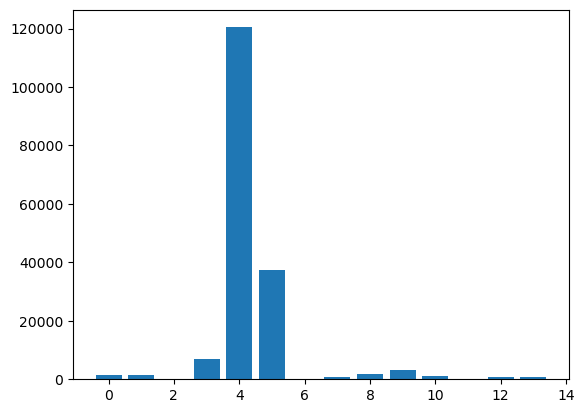

In [83]:
mplt.bar([i for i in range(len(fit.scores_))], fit.scores_)

This method shows that the features more important for the output are, in order: Power-1, Power-2, Solar Radiation (W/m2), Weekend, Week Day, Temperature, Relative Humidity (%), Power Diff Mean, CDH, HDH, Hour.

#### 3.2.2 - Wraper Methods

Evaluate subsets of features by training and testing different models, selecting the subset that optimizes a chosen performance metric. 

**Recursive Feature Elimination (RFE)**

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [85]:
model=LinearRegression() # LinearRegression Model as Estimator
rfe1=RFE(model,n_features_to_select=1)# using 1 features
rfe2=RFE(model,n_features_to_select=2) # using 2 features
rfe3=RFE(model,n_features_to_select=3)# using 3 features
rfe4=RFE(model,n_features_to_select=4)# using 4 features
rfe5=RFE(model,n_features_to_select=5)# using 5 features
rfe6=RFE(model,n_features_to_select=6)# using 6 features
rfe7=RFE(model,n_features_to_select=7)# using 7 features
fit1=rfe1.fit(X,Y)
fit2=rfe2.fit(X,Y)
fit3=rfe3.fit(X,Y)
fit4=rfe4.fit(X,Y)
fit5=rfe5.fit(X,Y)
fit6=rfe6.fit(X,Y)
fit7=rfe7.fit(X,Y)

In [86]:
print( "Feature Ranking (Linear Model, 1 features): %s" % (fit1.ranking_)) #Power Diff Mean
print( "Feature Ranking (Linear Model, 2 features): %s" % (fit2.ranking_)) #Power-1, Power Diff Mean
print( "Feature Ranking (Linear Model, 3 features): %s" % (fit3.ranking_)) #Power-1, Power-2, Power Diff Mean
print( "Feature Ranking (Linear Model, 4 features): %s" % (fit4.ranking_)) #Power-1, Power-2, Power Diff Mean, Holiday
print( "Feature Ranking (Linear Model, 5 features): %s" % (fit5.ranking_)) #Power-1, Power-2, Power Diff Mean, Month, Holiday
print( "Feature Ranking (Linear Model, 6 features): %s" % (fit6.ranking_)) #Power-1, Power-2, Power Diff Mean, HDH, Month, Holiday
print( "Feature Ranking (Linear Model, 7 features): %s" % (fit7.ranking_)) #Power-1, Power-2, Power Diff Mean, Temperature, HDH, Month, Holiday

Feature Ranking (Linear Model, 1 features): [ 9 10 12  7  2  3  4 11 13  6  1  5  8 14]
Feature Ranking (Linear Model, 2 features): [ 8  9 11  6  1  2  3 10 12  5  1  4  7 13]
Feature Ranking (Linear Model, 3 features): [ 7  8 10  5  1  1  2  9 11  4  1  3  6 12]
Feature Ranking (Linear Model, 4 features): [ 6  7  9  4  1  1  1  8 10  3  1  2  5 11]
Feature Ranking (Linear Model, 5 features): [ 5  6  8  3  1  1  1  7  9  2  1  1  4 10]
Feature Ranking (Linear Model, 6 features): [4 5 7 2 1 1 1 6 8 1 1 1 3 9]
Feature Ranking (Linear Model, 7 features): [3 4 6 1 1 1 1 5 7 1 1 1 2 8]


This method chooses different variables, such as Power-1, Power-2, Power Diff Mean, Temperature, HDH, Month, Holiday

#### 3.2.3 - Emsemble Methods

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
model = RandomForestRegressor()
model.fit(X, Y)
print(model.feature_importances_) # Power-1, Power Diff Mean, Power-2, Hour, Month, Temperature (ºC), Solar Radiation (W/m2), Relative Humidity (%), Pressure (mbar),...   

[2.14911835e-04 1.52546439e-04 1.27004954e-04 2.16982500e-04
 8.52523366e-01 5.79310758e-03 2.71206593e-04 1.35577403e-03
 7.50612293e-05 3.81149913e-05 1.39110491e-01 7.38716866e-06
 7.49985508e-05 3.90476038e-05]


### 3.3 - Final Features

After running some feature selection methods, we can see that the results vary depending on the method, so it's not 100% accurate no matter what features we choose.

On one hand, picking just a few features might not give us a great model. On the other hand, having too many variables could lead to either overfitting the data or creating a model that requires a lot of computing power. This isn't ideal for real-world situations where we have lots of features and data.

So, i decided to choose the features: Power-1, Power-2, Power Diff Mean, Temperature (ºC), Holiday, Month, Weekend and Solar Radiation (W/m2)

In [89]:
df_final = df_final.drop(['RH (%)','P (mbar)','CDH', 'HDH', 'Week Day', 'Hour'], axis=1)
df_final.head()

Power (kW) [Y]  Temperature (ºC)  SR (W/m2)    Power-1  \
2017-01-01 02:00:00       42.861834          7.263417   1.415083  42.751928   
2017-01-01 03:00:00       42.317769          6.831333   1.542000  42.861834   
2017-01-01 04:00:00       42.653385          6.500250   0.891000  42.317769   
2017-01-01 05:00:00       42.437725          6.006417   1.375833  42.653385   
2017-01-01 06:00:00       42.307281          5.645833   0.988000  42.437725   

                       Power-2  Month  Weekend  Power Diff Mean  Holiday  
2017-01-01 02:00:00  42.996430      1        1        -0.008230        1  
2017-01-01 03:00:00  42.751928      1        1        -0.326075        1  
2017-01-01 04:00:00  42.861834      1        1         0.042389        1  
2017-01-01 05:00:00  42.317769      1        1        -0.031901        1  
2017-01-01 06:00:00  42.653385      1        1        -0.158849        1

## 4 - Regression Models

Lastly, we need to develop the models using the features we chose and decide which one fits the best

In [90]:
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import statsmodels.api as sm

### 4.1 - Time series analysis

In [91]:
#The frequency of decomposition must be an interval, which 'may' repeat. So we have data with 1 hour frequency and we are looking for a daily repetition of behavior.
# So the frequency is 24h
freq = 24

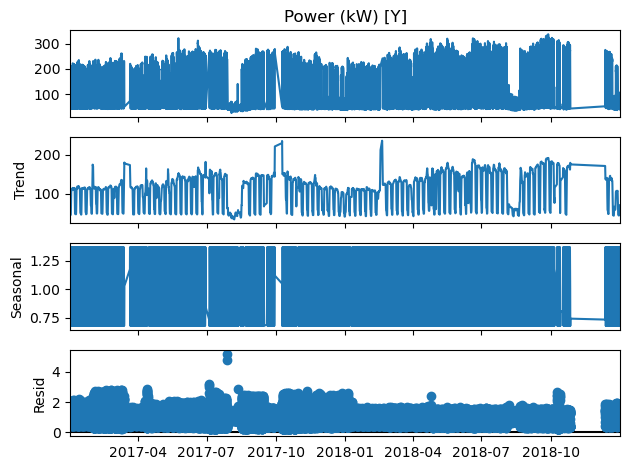

In [92]:
res = sm.tsa.seasonal_decompose(df_final['Power (kW) [Y]'],
                                period=freq,
                                model='multiplicative')
#model='additive'
resplot = res.plot()
#resplot.savefig('Seasonal_Decompose.png')

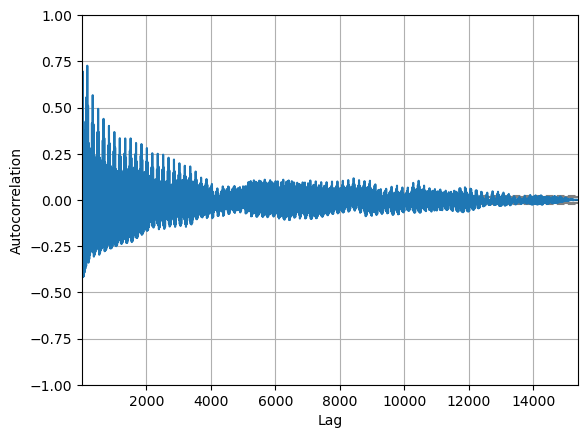

In [93]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(df_final['Power (kW) [Y]'])
mplt.show()

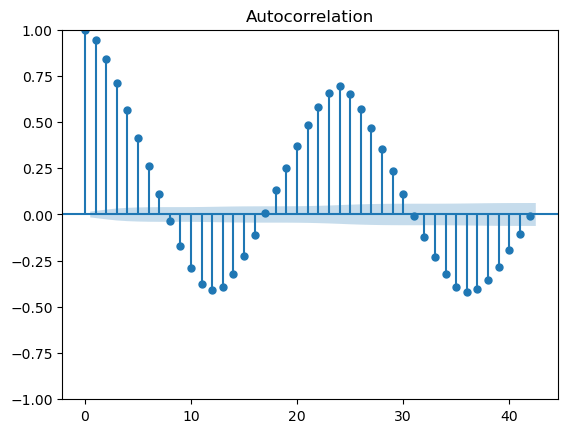

In [94]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(df_final['Power (kW) [Y]'])
mplt.show()


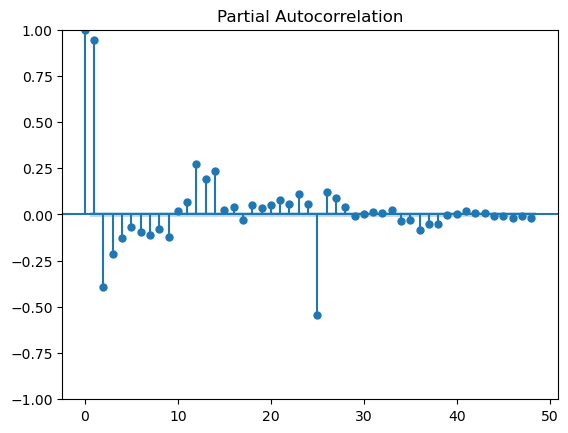

In [95]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plot_pacf(df_final['Power (kW) [Y]'],lags=48) # one day=24 lags / one week 24*7=168 lags
mplt.show()

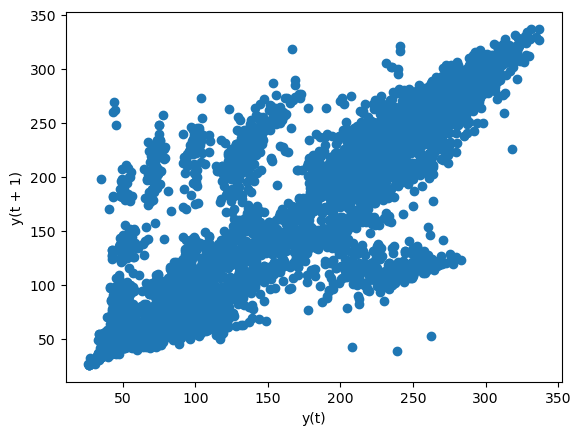

In [96]:
from pandas.plotting import lag_plot
lag_plot(df_final['Power (kW) [Y]'])
mplt.show()

### 4.2 - Auto Regressive Models

#### AR

In [97]:
from statsmodels.tsa.ar_model import AutoReg
#from statsmodels.tsa.arima.model import ARIMA

#Identify output Y
Y=df_final.values[:,0]

split_point = len(Y) - 1000
train, test = Y[0:split_point], Y[split_point:]
# train autoregression
window = 1
model = AutoReg(train, lags=window)
#model=ARIMA(train, order=(1, 1,1))
model_fit = model.fit()

print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                14382
Model:                     AutoReg(1)   Log Likelihood              -68597.347
Method:               Conditional MLE   S.D. of innovations             28.533
Date:                Mon, 25 Mar 2024   AIC                         137200.694
Time:                        14:46:46   BIC                         137223.415
Sample:                             1   HQIC                        137208.248
                                14382                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4764      0.390     16.617      0.000       5.712       7.240
y.L1           0.9406      0.003    332.266      0.000       0.935       0.946
                                    Roots           

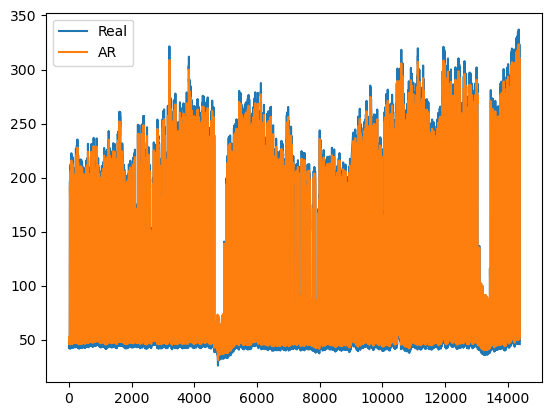

In [98]:
#model_fit.plot_predict()
mplt.plot(train,label='Real')
mplt.plot(model_fit.fittedvalues,label='AR')
mplt.legend()

**Testing the AR model with test data**

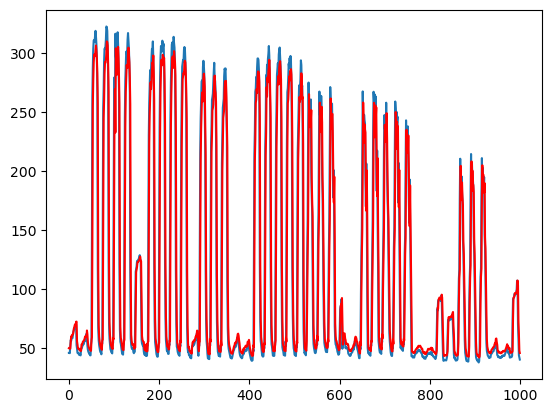

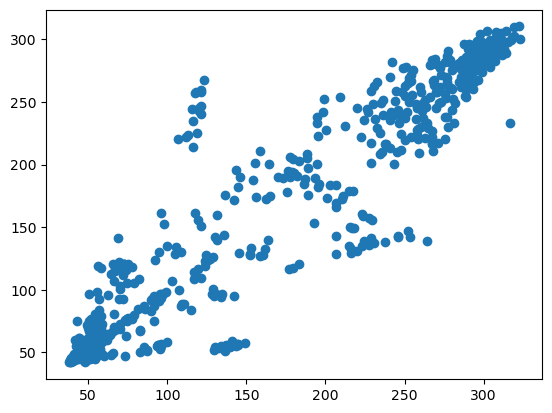

In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt

coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# plot
mplt.plot(test)
mplt.plot(predictions, color='red')
mplt.show()

mplt.scatter(test,predictions)
mplt.show()

**Evaluating the model error**

In [100]:
MAE_AR=metrics.mean_absolute_error(test,predictions) 
MBE_AR=np.mean(test-predictions) #here we calculate MBE
MSE_AR=metrics.mean_squared_error(test,predictions)  
RMSE_AR= np.sqrt(metrics.mean_squared_error(test,predictions))
cvRMSE_AR=RMSE_AR/np.mean(test)
NMBE_AR=MBE_AR/np.mean(test)
print(MAE_AR, MBE_AR,MSE_AR, RMSE_AR,cvRMSE_AR,NMBE_AR)

16.693884318782832 0.6231272486755437 844.273383725411 29.056382839669 0.2428781965776088 0.005208632582788729


### 4.3 - Split Data into training and test data

**Create vector with inputs and outputs**

In [101]:
df_final

Power (kW) [Y]  Temperature (ºC)  SR (W/m2)     Power-1  \
2017-01-01 02:00:00       42.861834          7.263417   1.415083   42.751928   
2017-01-01 03:00:00       42.317769          6.831333   1.542000   42.861834   
2017-01-01 04:00:00       42.653385          6.500250   0.891000   42.317769   
2017-01-01 05:00:00       42.437725          6.006417   1.375833   42.653385   
2017-01-01 06:00:00       42.307281          5.645833   0.988000   42.437725   
...                             ...               ...        ...         ...   
2018-12-31 19:00:00       70.132164         13.361667   1.112333  102.898642   
2018-12-31 20:00:00       58.661569         12.810000   1.322417   70.132164   
2018-12-31 21:00:00       43.897742         12.565000   1.195500   58.661569   
2018-12-31 22:00:00       41.808445         11.926667   1.117000   43.897742   
2018-12-31 23:00:00       40.234153         11.338571   1.388643   41.808445   

                        Power-2  Month  Weekend  Power Diff Mean  Holiday  
2017-01-01 02:00:00   42.996430      1        1        -0.008230        1  
2017-01-01 03:00:00   42.751928      1        1        -0.326075        1  
2017-01-01 04:00:00   42.861834      1        1         0.042389        1  
2017-01-01 05:00:00   42.317769      1        1        -0.031901        1  
2017-01-01 06:00:00   42.653385      1        1        -0.158849        1  
...                         ...    ...      ...              ...      ...  
2018-12-31 19:00:00  107.208991     12        0       -23.281102        0  
2018-12-31 20:00:00  102.898642     12        0       -18.569223        0  
2018-12-31 21:00:00   70.132164     12        0       -13.666083        0  
2018-12-31 22:00:00   58.661569     12        0        -6.314140        0  
2018-12-31 23:00:00   43.897742     12        0        -1.745961        0  

[15382 rows x 9 columns]

In [102]:
#Create matrix from data frame
Z=df_final.values
#Identify output Y
Y=Z[:,0]
#Identify input Y
X=Z[:,[1,2,3,4,5,6,7,8]]

In [103]:
#by default, it chooses randomly 75% of the data for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y)
print(X_train)
print(y_train)

[[ 1.50833333e+01  7.66566667e+00  3.35495825e+01 ...  0.00000000e+00
  -3.67007167e-01  0.00000000e+00]
 [ 9.34833333e+00  2.15150000e+00  5.99686360e+01 ...  0.00000000e+00
  -1.64794157e+01  0.00000000e+00]
 [ 2.11708333e+01  4.98166667e-01  1.59591963e+02 ...  0.00000000e+00
  -5.10277617e+01  0.00000000e+00]
 ...
 [ 9.36000000e+00  7.08833333e+01  8.62642370e+01 ...  0.00000000e+00
   2.94017242e+01  0.00000000e+00]
 [ 1.65891667e+01  4.62633333e+00  4.91260105e+01 ...  0.00000000e+00
   5.70569050e+00  0.00000000e+00]
 [ 1.55183333e+01  2.14375000e+00  4.30943180e+01 ...  1.00000000e+00
  -1.02112333e-01  0.00000000e+00]]
[ 32.9714315  47.969927  119.796995  ... 111.2451235  57.4692145
  42.5989785]


### 4.4 - Linear Regression

In [104]:
from sklearn import  linear_model

# Create linear regression object
LR_model = linear_model.LinearRegression()

# Train the model using the training sets
LR_model.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_LR = LR_model.predict(X_test)

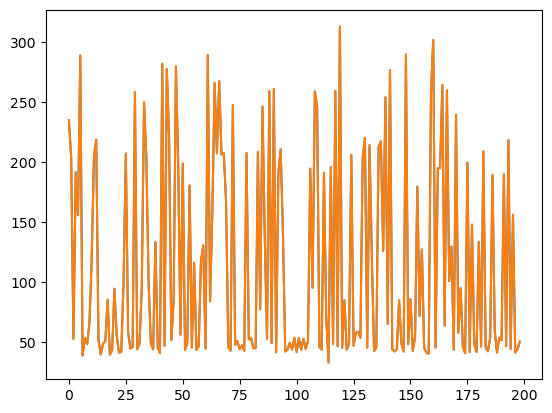

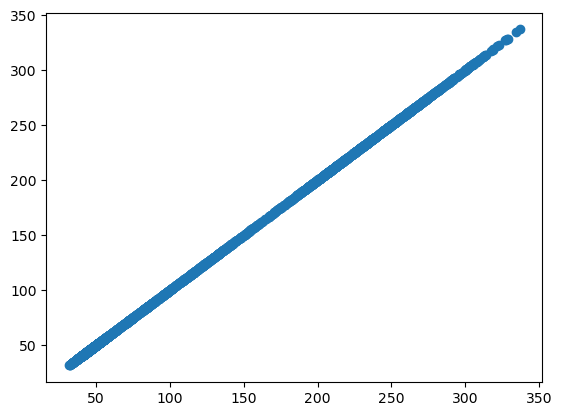

In [105]:
mplt.plot(y_test[1:200])
mplt.plot(y_pred_LR[1:200])
mplt.show()
mplt.scatter(y_test,y_pred_LR)

**Evaluating the model error**

In [106]:
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MBE_LR=np.mean(y_test- y_pred_LR) #here we calculate MBE
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
NMBE_LR=MBE_LR/np.mean(y_test)
print(MAE_LR, MBE_LR,MSE_LR, RMSE_LR,cvRMSE_LR,NMBE_LR)

1.0176132196672407e-13 8.194150275394623e-14 1.532338556417602e-26 1.237876632147809e-13 1.1290164833200063e-15 7.473548241774259e-16


### 4.5 - Support Vector Regressor

**Scale Data**

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

ss_X = StandardScaler()
ss_y = StandardScaler()
X_train_ss = ss_X.fit_transform(X_train)
y_train_ss = ss_y.fit_transform(y_train.reshape(-1,1))

In [108]:
svr = SVR(kernel='linear')
#kernel='linear'
#kernel='sigmoid'
#kernel='rbf'

svr.fit(X_train_ss,y_train_ss)

C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

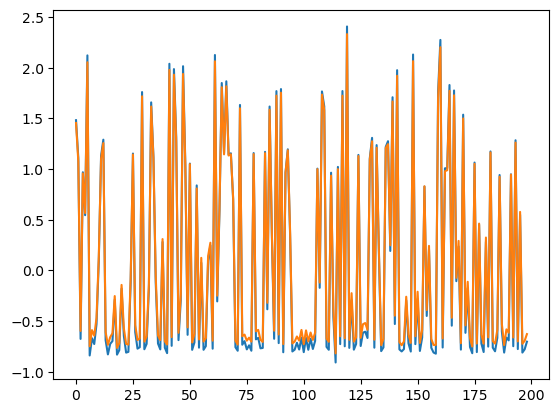

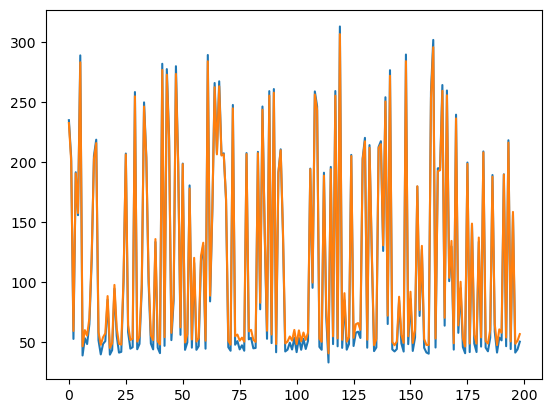

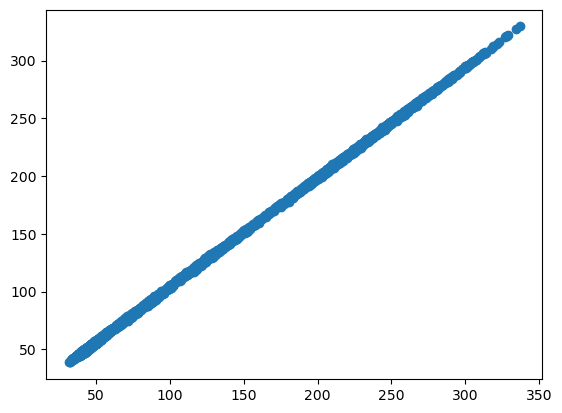

In [109]:
y_pred_SVR = svr.predict(ss_X.fit_transform(X_test))
y_test_SVR=ss_y.fit_transform(y_test.reshape(-1,1))#It is just one column we have to reshape, otherwise its a line
y_pred_SVR2=ss_y.inverse_transform(y_pred_SVR.reshape(-1,1))

mplt.plot(y_test_SVR[1:200])
mplt.plot(y_pred_SVR[1:200])
mplt.show()
mplt.plot(y_test[1:200])
mplt.plot(y_pred_SVR2[1:200])
mplt.show()
mplt.scatter(y_test, y_pred_SVR2)

**Evaluating the model error**

In [110]:
MAE_SVR=metrics.mean_absolute_error(y_test_SVR,y_pred_SVR) 
MBE_SVR=np.mean(y_test- y_pred_SVR) #here we calculate MBE
MSE_SVR=metrics.mean_squared_error(y_test_SVR,y_pred_SVR)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test_SVR,y_pred_SVR))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
NMBE_SVR=MBE_SVR/np.mean(y_test)
print(MAE_SVR, MBE_SVR,MSE_SVR, RMSE_SVR,cvRMSE_SVR,NMBE_SVR)

0.062142741588700104 109.59969777290239 0.004456147230060755 0.06675437985676112 0.0006088393078502601 0.9996138721659186


### 4.6 - Decision Tree Regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor(
#criterion='mse', 
#splitter='best', 
#max_depth=None, 
#min_samples_split=2, 
#min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, 
#max_features=None, 
#random_state=None, 
#max_leaf_nodes=None, 
#min_impurity_decrease=0.0, 
#min_impurity_split=None, 
#presort='deprecated', 
#ccp_alpha=0.0)

# Create Regression Decision Tree object
DT_regr_model = DecisionTreeRegressor(min_samples_leaf=5)

# Train the model using the training sets
DT_regr_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_DT = DT_regr_model.predict(X_test)

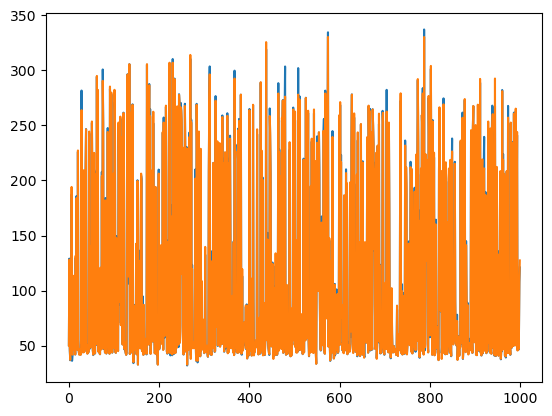

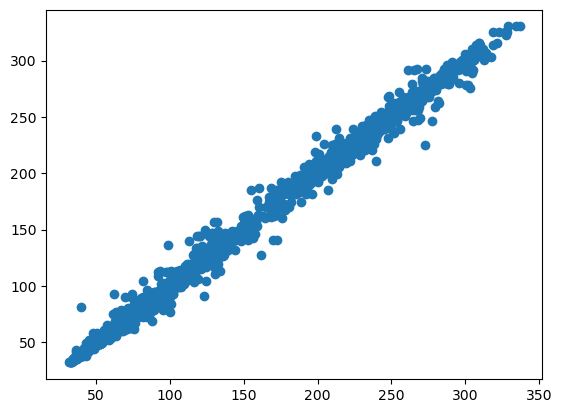

In [112]:
mplt.plot(y_test[1000:2000])
mplt.plot(y_pred_DT[1000:2000])
mplt.show()
mplt.scatter(y_test,y_pred_DT)

**Evaluating the model error**

In [113]:
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MBE_DT=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
NMBE_DT=MBE_DT/np.mean(y_test)
print(MAE_DT, MBE_DT,MSE_DT, RMSE_DT,cvRMSE_DT,NMBE_DT)

2.2914147125775317 -0.2013037051327586 20.906199884405297 4.572329809233505 0.041702344060273434 -0.001836008495078666


### 4.7 - Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)


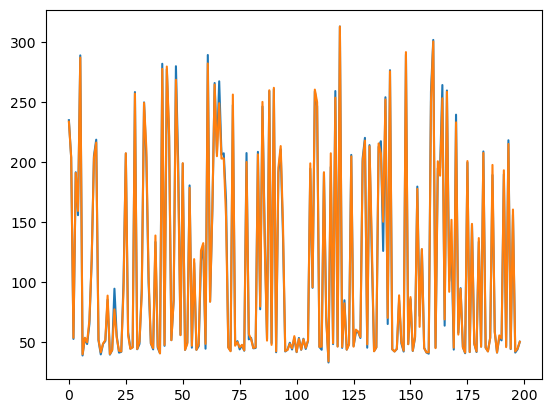

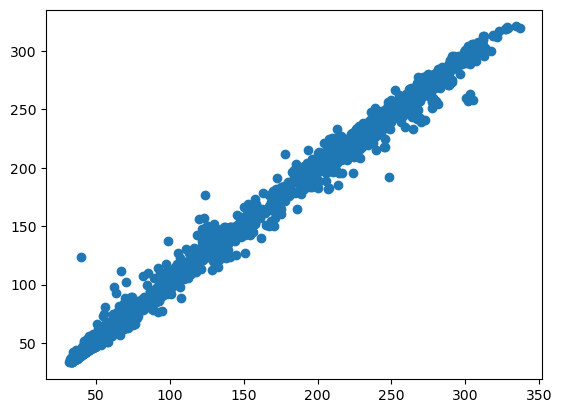

In [116]:
mplt.plot(y_test[1:200])
mplt.plot(y_pred_RF[1:200])
mplt.show()
mplt.scatter(y_test,y_pred_RF)

**Evaluating the model error**

In [117]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MBE_RF=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
print(MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF)

2.885335429207761 -0.2013037051327586 31.910287480003767 5.648919142632843 0.05152147362139447 -0.001836008495078666


### 4.8 - Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#GB_model = GradientBoostingRegressor(**params)

GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB =GB_model.predict(X_test)

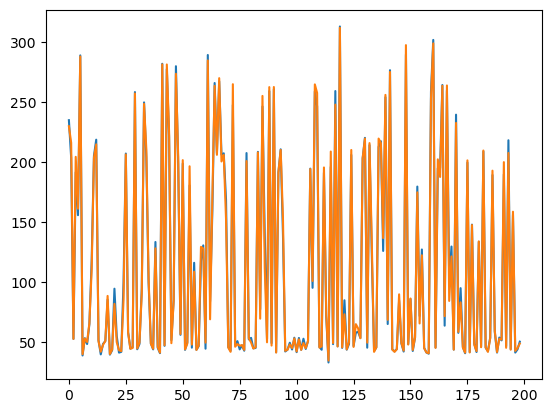

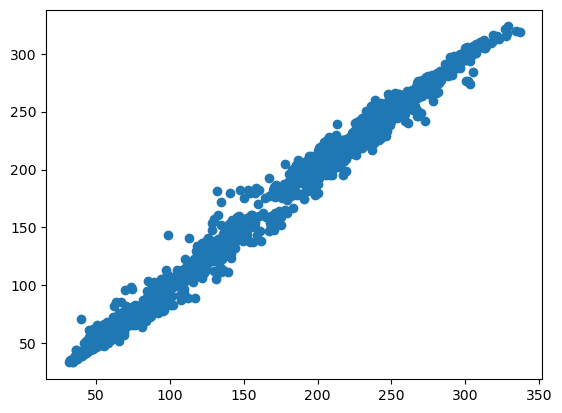

In [119]:
mplt.plot(y_test[1:200])
mplt.plot(y_pred_GB[1:200])
mplt.show()
mplt.scatter(y_test,y_pred_GB)

**Evaluating the model error**

In [120]:
MAE_GB=metrics.mean_absolute_error(y_test,y_pred_GB) 
MBE_GB=np.mean(y_test-y_pred_GB)
MSE_GB=metrics.mean_squared_error(y_test,y_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(y_test)
NMBE_GB=MBE_GB/np.mean(y_test)
print(MAE_GB,MBE_GB,MSE_GB,RMSE_GB,cvRMSE_GB,NMBE_GB)

3.164649749033871 -0.102428977927561 30.755056202094305 5.545724136854835 0.05058027431692483 -0.0009342126787641708


### 4.9 - Bootstrapping

In [121]:
from sklearn.ensemble import BaggingRegressor

BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)

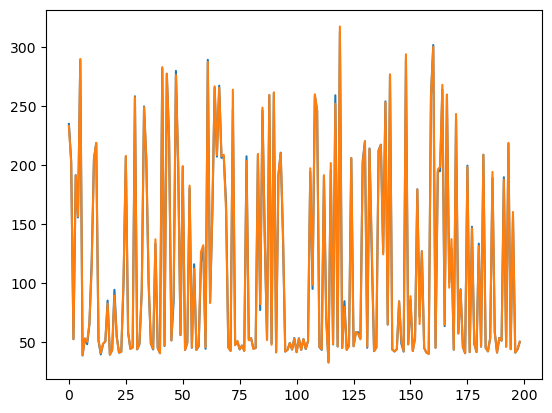

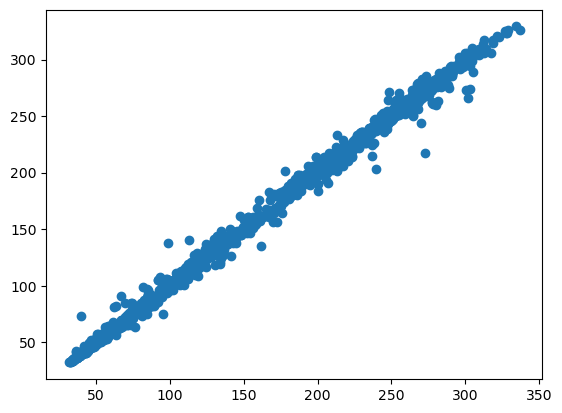

In [122]:
mplt.plot(y_test[1:200])
mplt.plot(y_pred_BT[1:200])
mplt.show()
mplt.scatter(y_test,y_pred_BT)

**Evaluating the model error**

In [123]:
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MBE_BT=np.mean(y_test-y_pred_BT)
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
NMBE_BT=MBE_BT/np.mean(y_test)
print(MAE_BT,MBE_BT,MSE_BT,RMSE_BT,cvRMSE_BT,NMBE_BT)

1.5069538374275682 -0.06287423570592829 11.49362425527869 3.390224808958646 0.03092084939703178 -0.0005734501051609174


### 5 - Model Evaluation

After running several models, we need to compare them according to the performance metrics.

In [124]:
# Define the results of performance metrics for each model
results = {
    'Model': ['Auto Regressive (AR)', 'Linear Regression', 'Support Vector Regressor', 
              'Decision Tree Regressor', 'Random Forest', 'Gradient Boosting', 'Bootstrapping'],
    'MAE': [MAE_AR, MAE_LR, MAE_SVR, MAE_DT, MAE_RF, MAE_GB, MAE_BT],
    'MBE': [MBE_AR, MBE_LR, MBE_SVR, MBE_DT, MBE_RF, MBE_GB, MBE_BT],
    'MSE': [MSE_AR, MSE_LR, MSE_SVR, MSE_DT, MSE_RF, MSE_GB, MSE_BT],
    'RMSE': [RMSE_AR, RMSE_LR, RMSE_SVR, RMSE_DT, RMSE_RF, RMSE_GB, RMSE_BT],
    'cvRMSE [%]': [cvRMSE_AR * 100, cvRMSE_LR * 100, cvRMSE_SVR * 100, cvRMSE_DT * 100, cvRMSE_RF * 100, cvRMSE_GB * 100, cvRMSE_BT * 100],
    'NMBE [%]': [NMBE_AR * 100, NMBE_LR * 100, NMBE_SVR * 100, NMBE_DT * 100, NMBE_RF * 100, NMBE_GB * 100, NMBE_BT * 100]
}

# Create DataFrame from the results with 'Model' column as index
df_results = pd.DataFrame(results)
df_results.set_index('Model', inplace=True)

# Find the minimum absolute values for cvRMSE and NMBE columns
min_abs_cvRMSE = df_results['cvRMSE [%]'].abs().min()
min_abs_NMBE = df_results['NMBE [%]'].abs().min()

# Style the DataFrame to highlight the minimum absolute values in 'cvRMSE' and 'NMBE' columns
def highlight_min_abs(s):
    is_min_cvRMSE = s.name == 'cvRMSE [%]' and abs(s) == min_abs_cvRMSE
    is_min_NMBE = s.name == 'NMBE [%]' and abs(s) == min_abs_NMBE
    return ['background-color: lightgreen' if v else '' for v in (is_min_cvRMSE | is_min_NMBE)]

# Apply the style to the DataFrame columns and set text alignment to center
df_results_styled = df_results.style.apply(highlight_min_abs, subset=['cvRMSE [%]', 'NMBE [%]']) \
                                    .set_properties(**{'text-align': 'center'}) \
                                    .set_table_styles([{'selector': 'th',
                                                        'props': [('text-align', 'center')]}])


# Display the styled DataFrame
df_results_styled

As we can see the best model is the linear regression wich respects the ASHRAE and IPMVP standarts

Now, to finish we just need to save this model

### 6 - Save Model

In [125]:
import pickle

In [126]:
#save LR model
with open('LR_model.pkl','wb') as file:
    pickle.dump(LR_model, file)